# Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Load Dataset

In [2]:
data = pd.read_excel("case_study2.xlsx")
data

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


# EDA -EXPLORATORY DATA ANALYSIS

In [82]:
data.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549,35,15,11,29,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302,11,3,9,25,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,AL,AL,753,P1


In [4]:
data.tail()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
51331,51332,15,24,23,2,24,24,0,0,0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,51333,57,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,51334,32,-99999,-99999,0,-99999,0,0,0,0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,51335,58,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2
51335,51336,74,-99999,-99999,0,-99999,0,0,0,0,...,0.0,0.0,0.0,-99999.000,0,0,others,others,681,P2


In [28]:
data.shape

(51336, 62)

In [34]:
data.dtypes

PROSPECTID                       int64
time_since_recent_payment        int64
time_since_first_deliquency      int64
time_since_recent_deliquency     int64
num_times_delinquent             int64
                                 ...  
GL_Flag                          int64
last_prod_enq2                  object
first_prod_enq2                 object
Credit_Score                     int64
Approved_Flag                   object
Length: 62, dtype: object

In [35]:
data.size

3182832

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 62 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

In [37]:
data.describe()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,Credit_Score
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,...,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,-8129.961314,-70020.091320,-70022.375838,1.573749,-70003.987085,13.521953,0.184977,0.480053,0.295076,...,-86556.225194,0.167874,0.190414,0.065182,0.170492,0.056302,-45127.943635,0.271116,0.052887,679.859222
std,14819.571046,27749.328514,45823.312757,45819.820741,4.165012,45847.976100,53.336976,0.710240,1.522210,1.027471,...,34111.414750,0.373758,0.376218,0.235706,0.350209,0.213506,49795.784556,0.444540,0.223810,20.502764
min,1.000000,-99999.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,469.000000
25%,12834.750000,46.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,0.000000,0.000000,669.000000
50%,25668.500000,70.000000,-99999.000000,-99999.000000,0.000000,-99999.000000,0.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333000,0.000000,0.000000,680.000000
75%,38502.250000,161.000000,8.000000,3.000000,1.000000,15.000000,10.000000,0.000000,0.000000,0.000000,...,-99999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.164250,1.000000,0.000000,691.000000
max,51336.000000,6065.000000,35.000000,35.000000,74.000000,900.000000,900.000000,12.000000,28.000000,20.000000,...,1.708000,1.000000,1.000000,1.000000,1.000000,1.000000,173800.000000,1.000000,1.000000,811.000000


In [164]:
data.nunique()

PROSPECTID                      51336
time_since_recent_payment        2435
time_since_first_deliquency        37
time_since_recent_deliquency       37
num_times_delinquent               64
                                ...  
GL_Flag                             2
last_prod_enq2                      6
first_prod_enq2                     6
Credit_Score                      250
Approved_Flag                       4
Length: 62, dtype: int64

In [39]:
for col in data.columns:
    print(col)
    print(data[col].value_counts())
    print("--------------")


PROSPECTID
PROSPECTID
51336    1
1        1
2        1
3        1
4        1
        ..
13       1
12       1
11       1
10       1
9        1
Name: count, Length: 51336, dtype: int64
--------------
time_since_recent_payment
time_since_recent_payment
-99999    4291
 51        606
 49        605
 63        604
 52        580
          ... 
 1963        1
 2124        1
 3562        1
 1519        1
 2178        1
Name: count, Length: 2435, dtype: int64
--------------
time_since_first_deliquency
time_since_first_deliquency
-99999    35949
 35        1855
 34         596
 33         563
 7          488
 9          475
 29         471
 31         468
 6          467
 5          466
 8          459
 10         454
 32         447
 30         446
 11         441
 27         435
 26         431
 28         429
 12         412
 4          402
 14         396
 13         393
 25         392
 18         372
 3          366
 17         362
 15         356
 16         351
 24         349
 19      

In [41]:
data.duplicated().sum()

np.int64(0)

In [131]:
data.isna().sum()

time_since_recent_payment       0
time_since_first_deliquency     0
time_since_recent_deliquency    0
num_times_delinquent            0
max_delinquency_level           0
                               ..
GL_Flag                         0
last_prod_enq2                  0
first_prod_enq2                 0
Credit_Score                    0
Approved_Flag                   0
Length: 61, dtype: int64

# DATA PREPROCESSSING

## Replace missing values(-99999)  to NaN

In [3]:
numeric_cols = data.select_dtypes(include="number").columns

for col in numeric_cols:
    data[col] = data[col].replace(-99999, np.nan)

In [84]:
data.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549.0,35.0,15.0,11,29.0,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47.0,NaN,NaN,0,NaN,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302.0,11.0,3.0,9,25.0,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,NaN,NaN,NaN,0,NaN,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583.0,NaN,NaN,0,NaN,0,0,0,0,...,0.0,0.0,0.0,NaN,0,0,AL,AL,753,P1


## Target column distribultion

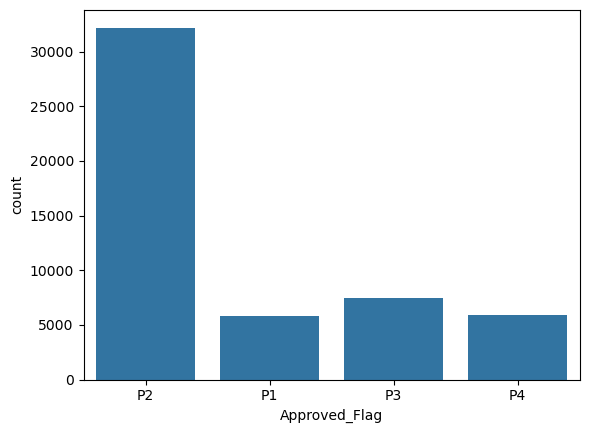

In [8]:
sns.countplot(data=data,x='Approved_Flag')
plt.show()

### Histogram for data distribution checking

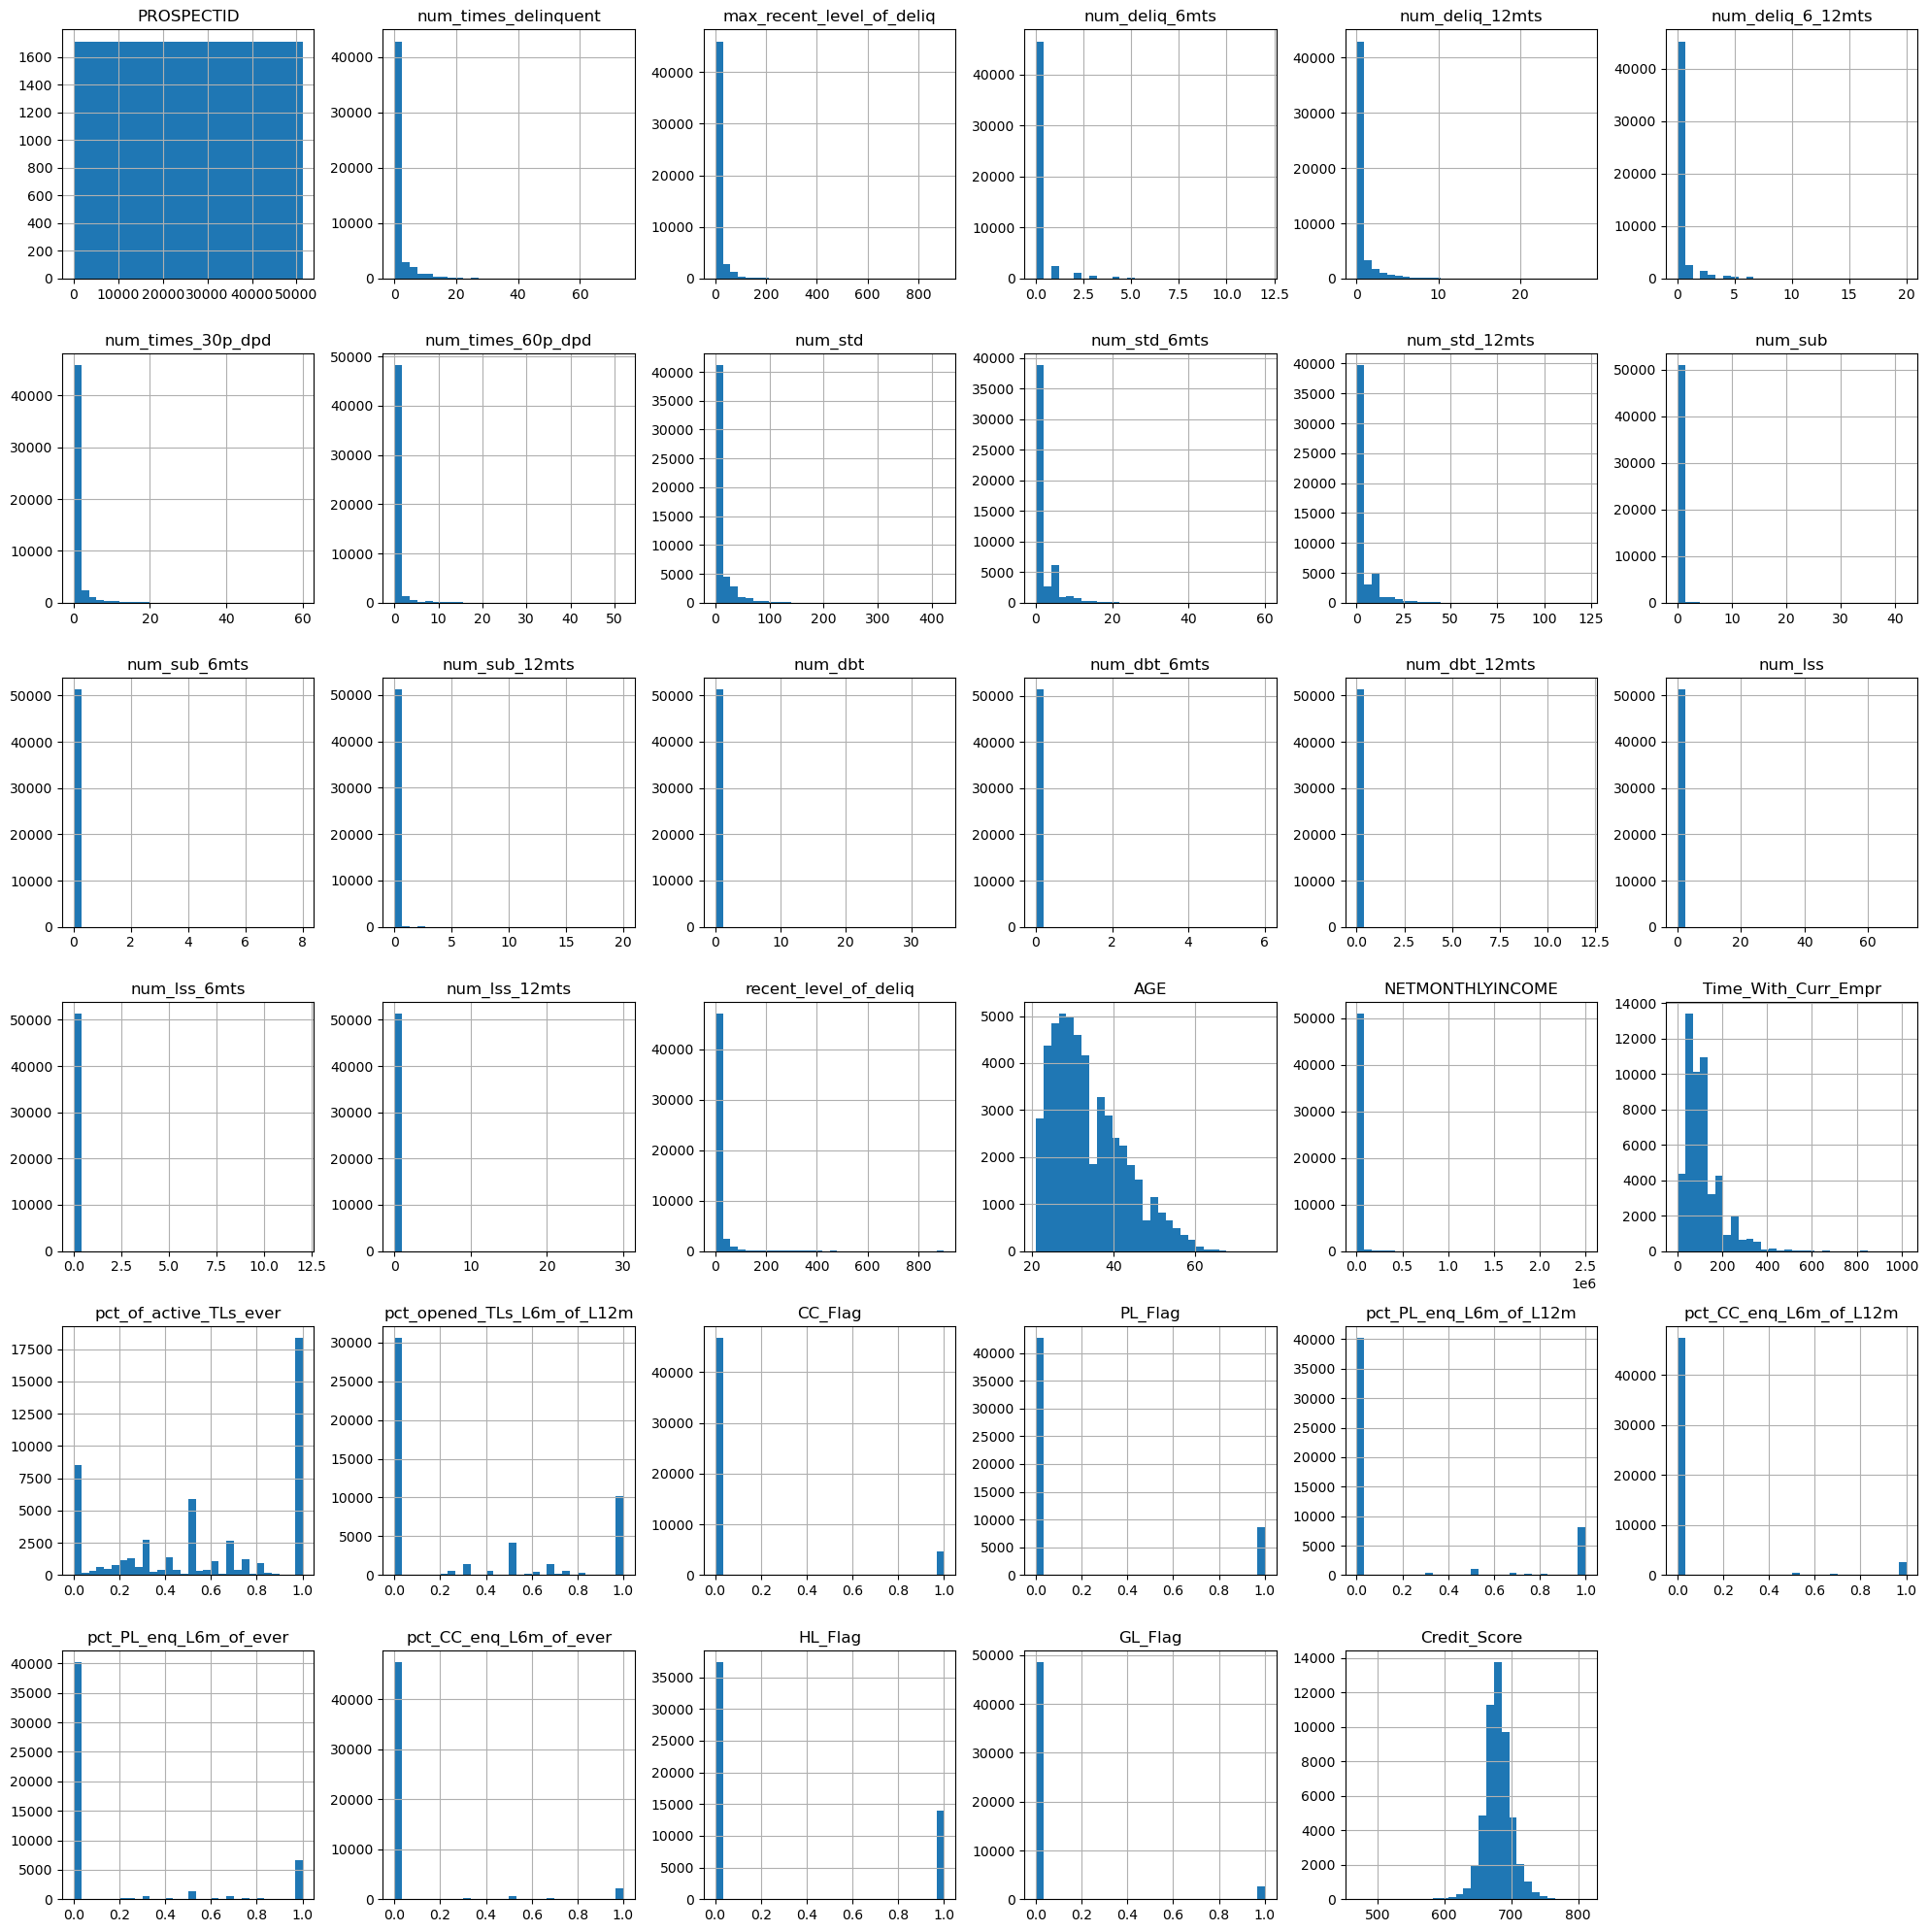

In [45]:
data.hist(figsize=(62, 62), bins=30)
plt.tight_layout()
plt.show()

#### data columns are almost skewed, so we are filling with MEDIAN.

In [4]:
numeric_cols = data.select_dtypes(include="number").columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

In [5]:
data.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,1,549.0,35.0,15.0,11,29.0,29,0,0,0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,2,47.0,21.0,10.0,0,33.0,0,0,0,0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,3,302.0,11.0,3.0,9,25.0,25,1,9,8,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,4,74.0,21.0,10.0,0,33.0,0,0,0,0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,5,583.0,21.0,10.0,0,33.0,0,0,0,0,...,0.0,0.0,0.0,1.820,0,0,AL,AL,753,P1


### correlation for data relationships

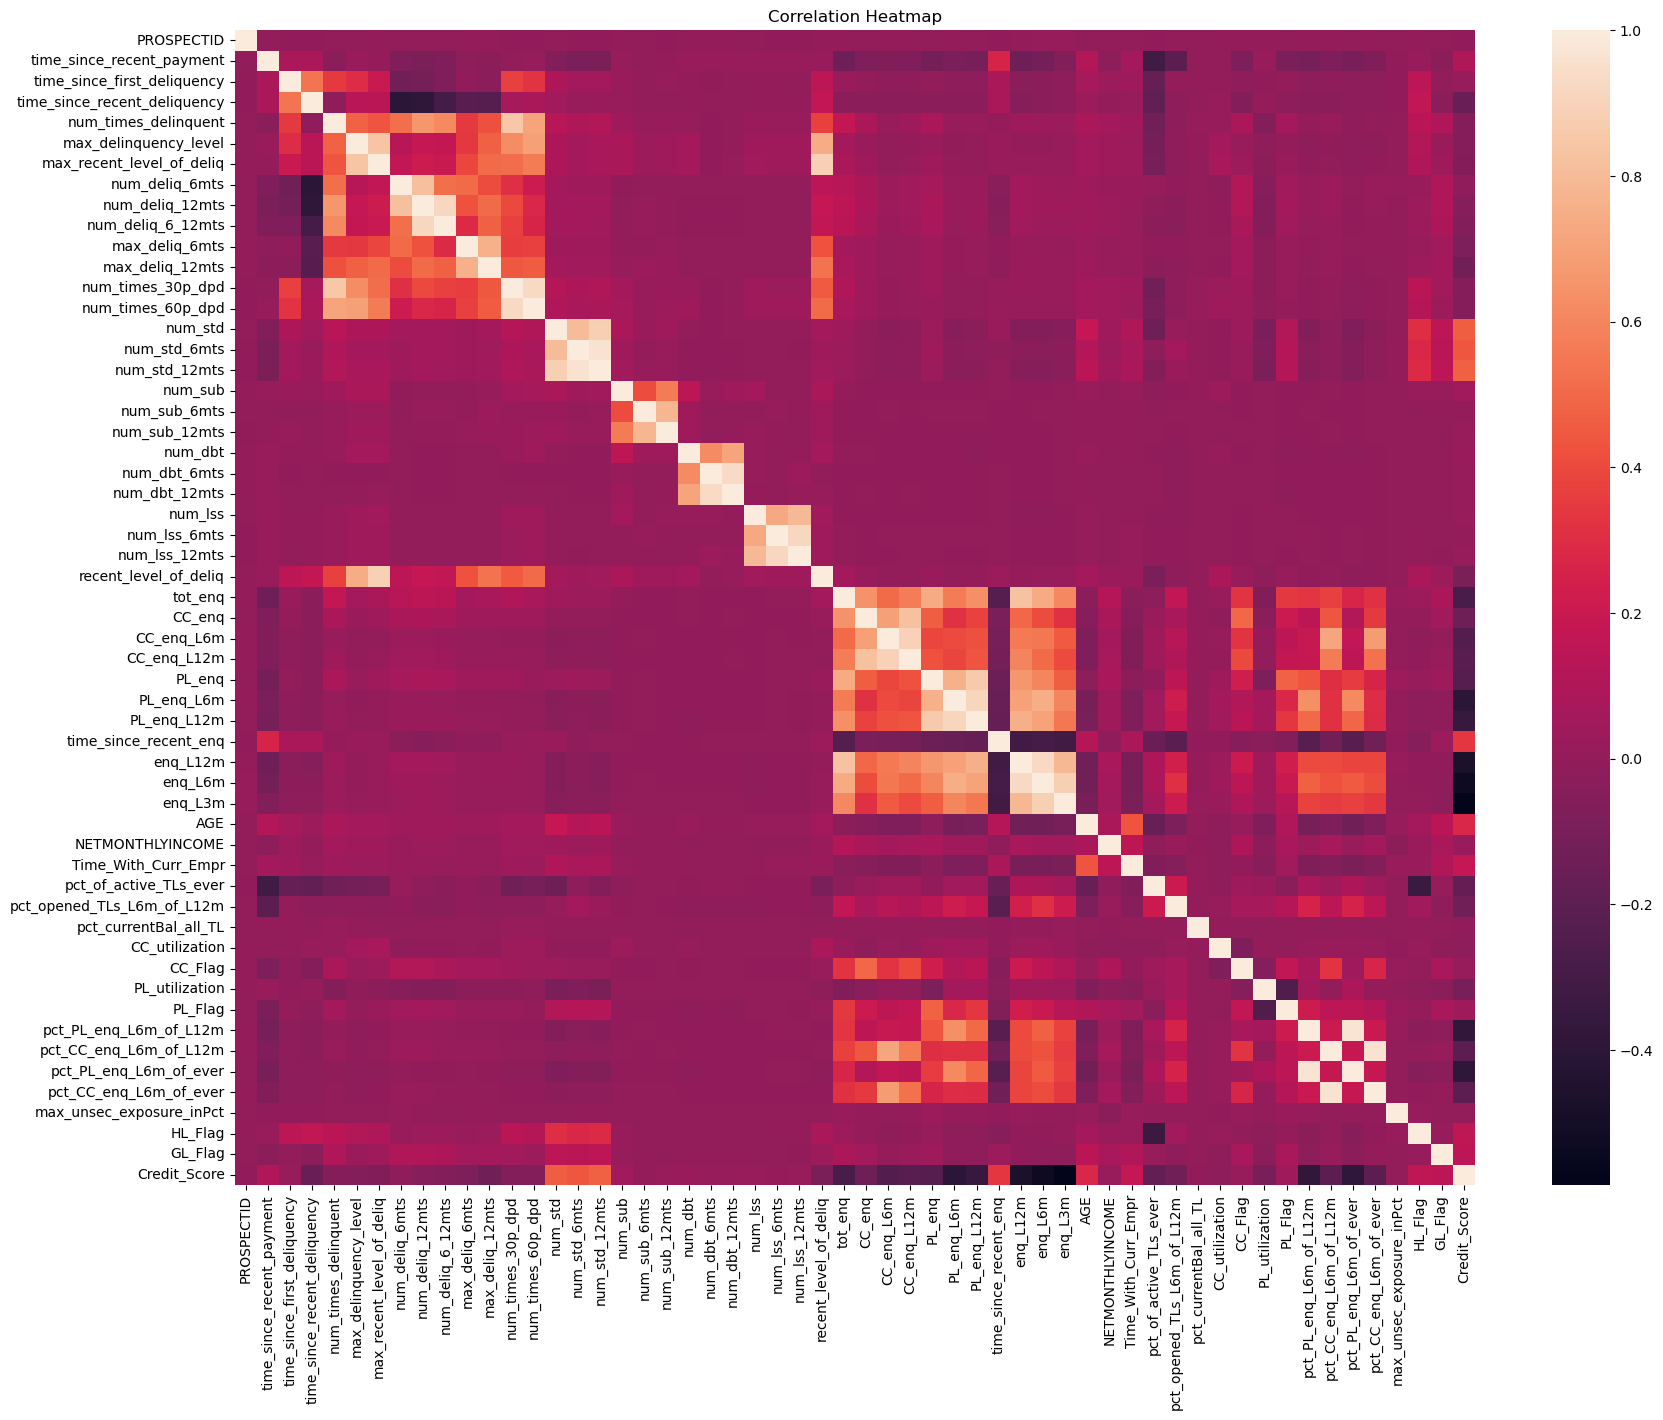

In [26]:
numeric_data = data.select_dtypes(include="number")
corr = numeric_data.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=False)
plt.title("Correlation Heatmap")
plt.show()

## Box plot for numeric columns

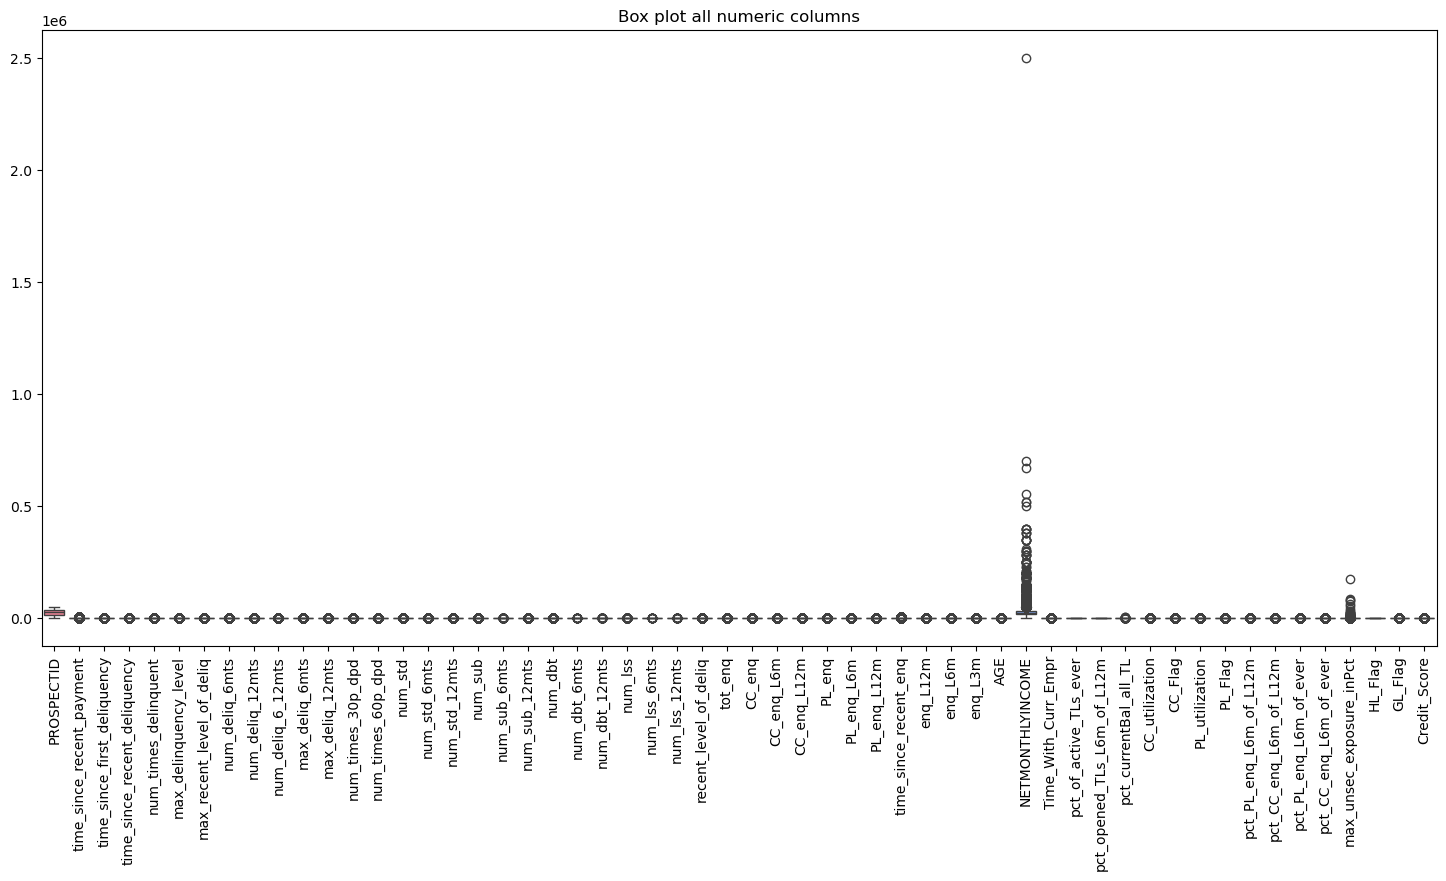

In [5]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 8))
sns.boxplot(data=data[numeric_cols], orient='v')
plt.title("Box plot all numeric columns")
plt.xticks(rotation=90)
plt.show()

### feature selection(same and unwanted columns)

In [6]:
data = data.drop("PROSPECTID",axis=1)

In [60]:
data

,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,...,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score,Approved_Flag
0,549.0,35.0,15.0,11,29.0,29,0,0,0,0.0,...,0.0,0.0,0.0,13.333,1,0,PL,PL,696,P2
1,47.0,21.0,10.0,0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,685,P2
2,302.0,11.0,3.0,9,25.0,25,1,9,8,25.0,...,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,693,P2
3,74.0,21.0,10.0,0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,9.900,0,0,others,others,673,P2
4,583.0,21.0,10.0,0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,1.820,0,0,AL,AL,753,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,24.0,23.0,2,24.0,24,0,0,0,0.0,...,0.0,0.0,0.0,1.661,0,0,ConsumerLoan,ConsumerLoan,650,P4
51332,57.0,21.0,10.0,0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.520,0,0,others,others,702,P1
51333,32.0,21.0,10.0,0,33.0,0,0,0,0,0.0,...,0.0,1.0,0.0,0.567,0,0,ConsumerLoan,others,661,P3
51334,58.0,21.0,10.0,0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,1.202,0,0,ConsumerLoan,others,686,P2


# Handling ouliers

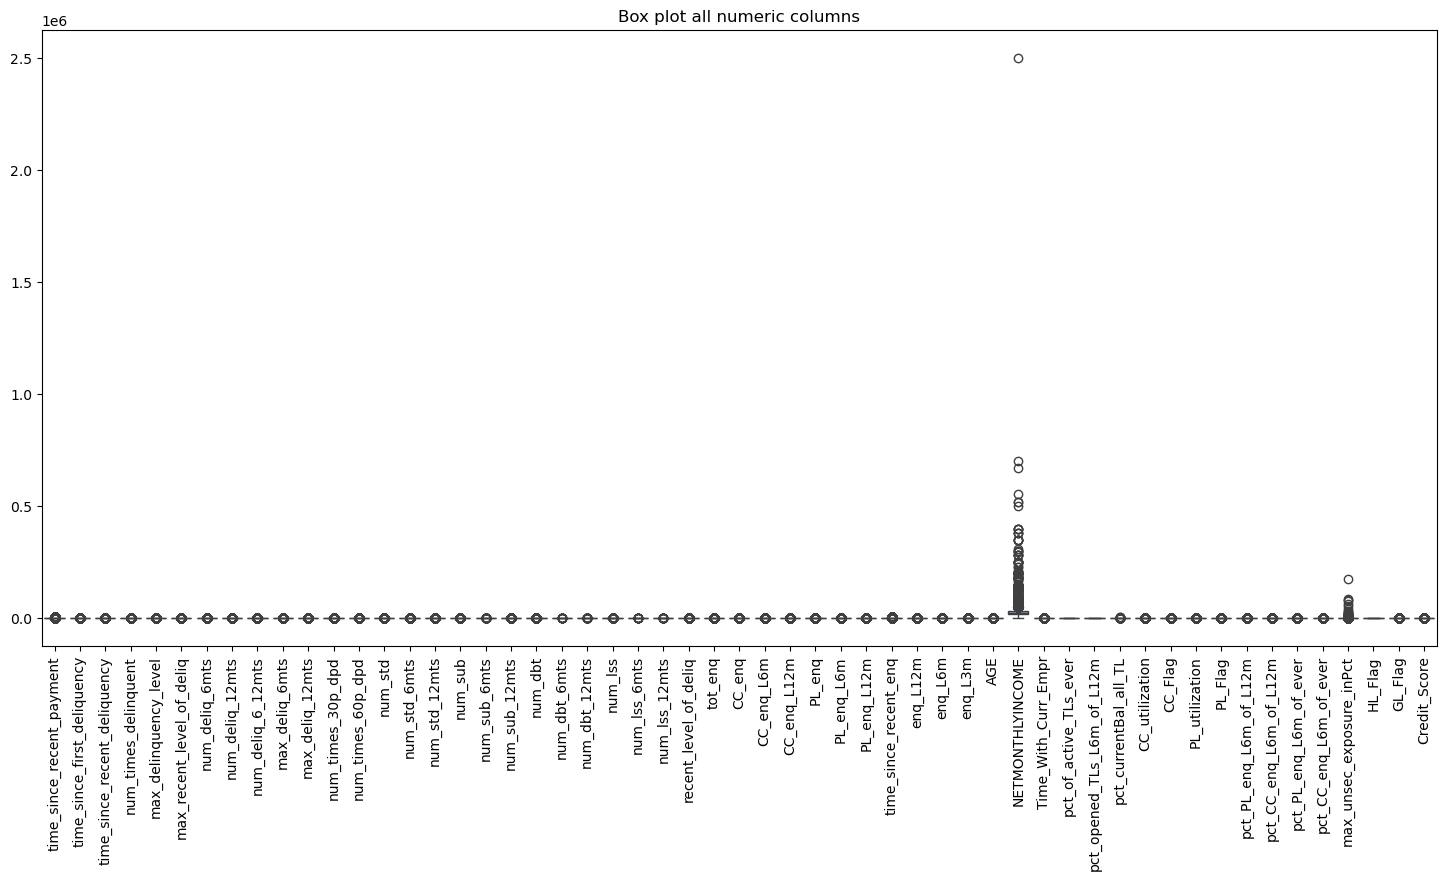

In [61]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(18, 8))
sns.boxplot(data=data[numeric_cols])
plt.title("Box plot all numeric columns")
plt.xticks(rotation=90)
plt.show()

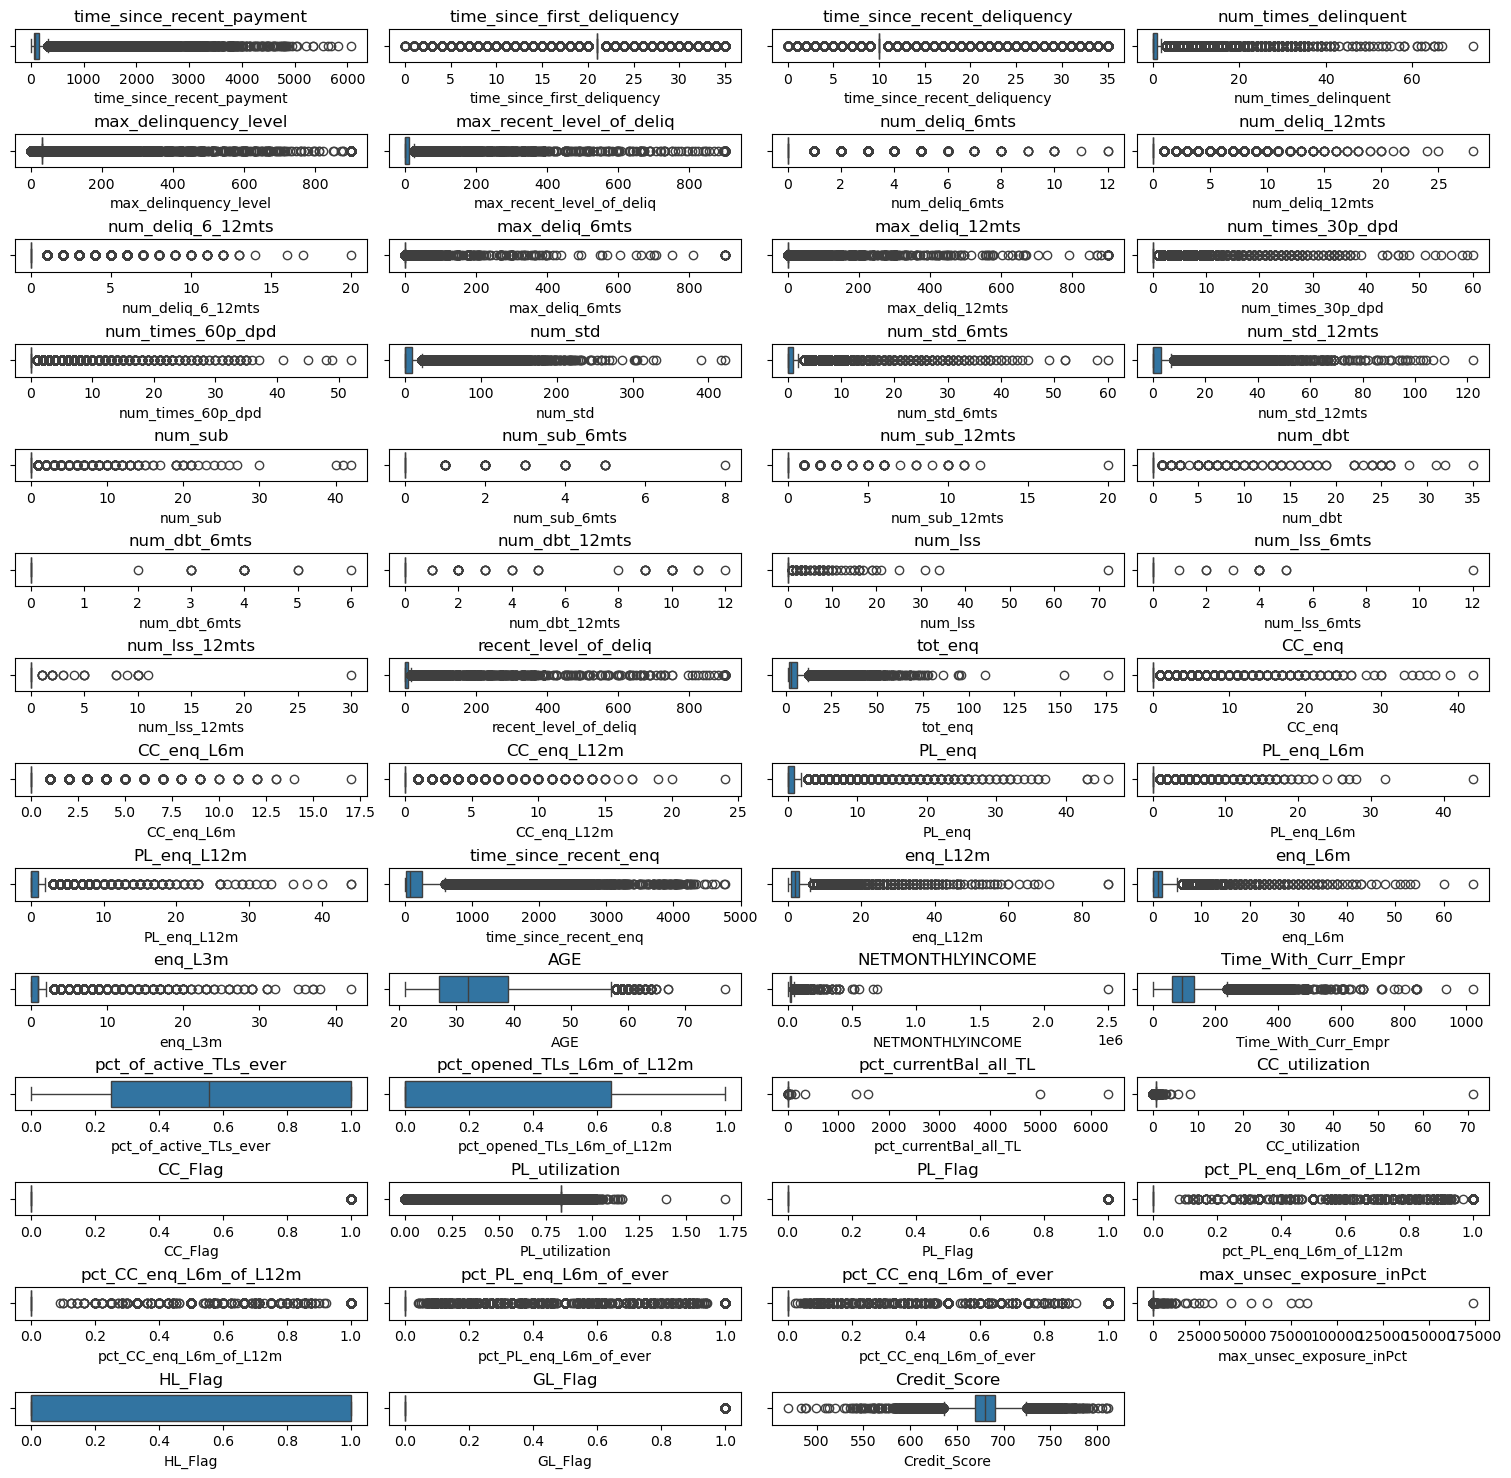

In [20]:

plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(numeric_cols)):
       plt.subplot(15,4,i+1)
       sns.boxplot(data=data,x=numeric_cols[i])
       plt.title(numeric_cols[i])
plt.show()

In [7]:
cols = ["time_since_recent_payment","time_since_first_deliquency","time_since_recent_deliquency","time_since_recent_enq",
        "Time_With_Curr_Empr","num_deliq_6_12mts","max_recent_level_of_deliq","recent_level_of_deliq","max_unsec_exposure_inPct",
        "CC_enq_L6m","PL_enq_L6m","enq_L12m","PL_enq_L12m","pct_of_active_TLs_ever","pct_opened_TLs_L6m_of_L12m","pct_currentBal_all_TL",
        "CC_utilization","NETMONTHLYINCOME",'max_deliq_6mts','num_std','max_delinquency_level','num_times_delinquent','num_deliq_6mts',
        'num_deliq_12mts','max_deliq_12mts','num_times_30p_dpd','num_times_60p_dpd','num_std_6mts','num_std_12mts','num_sub','num_sub_6mts',
       'num_sub_12mts','num_dbt','num_dbt_6mts','num_dbt_12mts','num_lss','tot_enq','CC_enq','num_lss_12mts','CC_enq_L12m',
       'PL_enq','enq_L6m','enq_L3m','AGE','PL_utilization','pct_PL_enq_L6m_of_L12m','pct_CC_enq_L6m_of_L12m','pct_PL_enq_L6m_of_ever',
       'pct_CC_enq_L6m_of_ever','Credit_Score','CC_Flag','PL_Flag','GL_Flag','num_lss_6mts']
for i in cols:
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  data.loc[(data[i]>=upper_limit),i]=upper_limit
  data.loc[(data[i]<=lower_limit),i]=lower_limit

In [63]:
print(upper_limit)
print(lower_limit)

0.0
0.0


In [64]:
data.columns

Index(['time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m',
       'enq_L3m', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER',
       'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Flag', 'pct_PL_enq_L6m_o

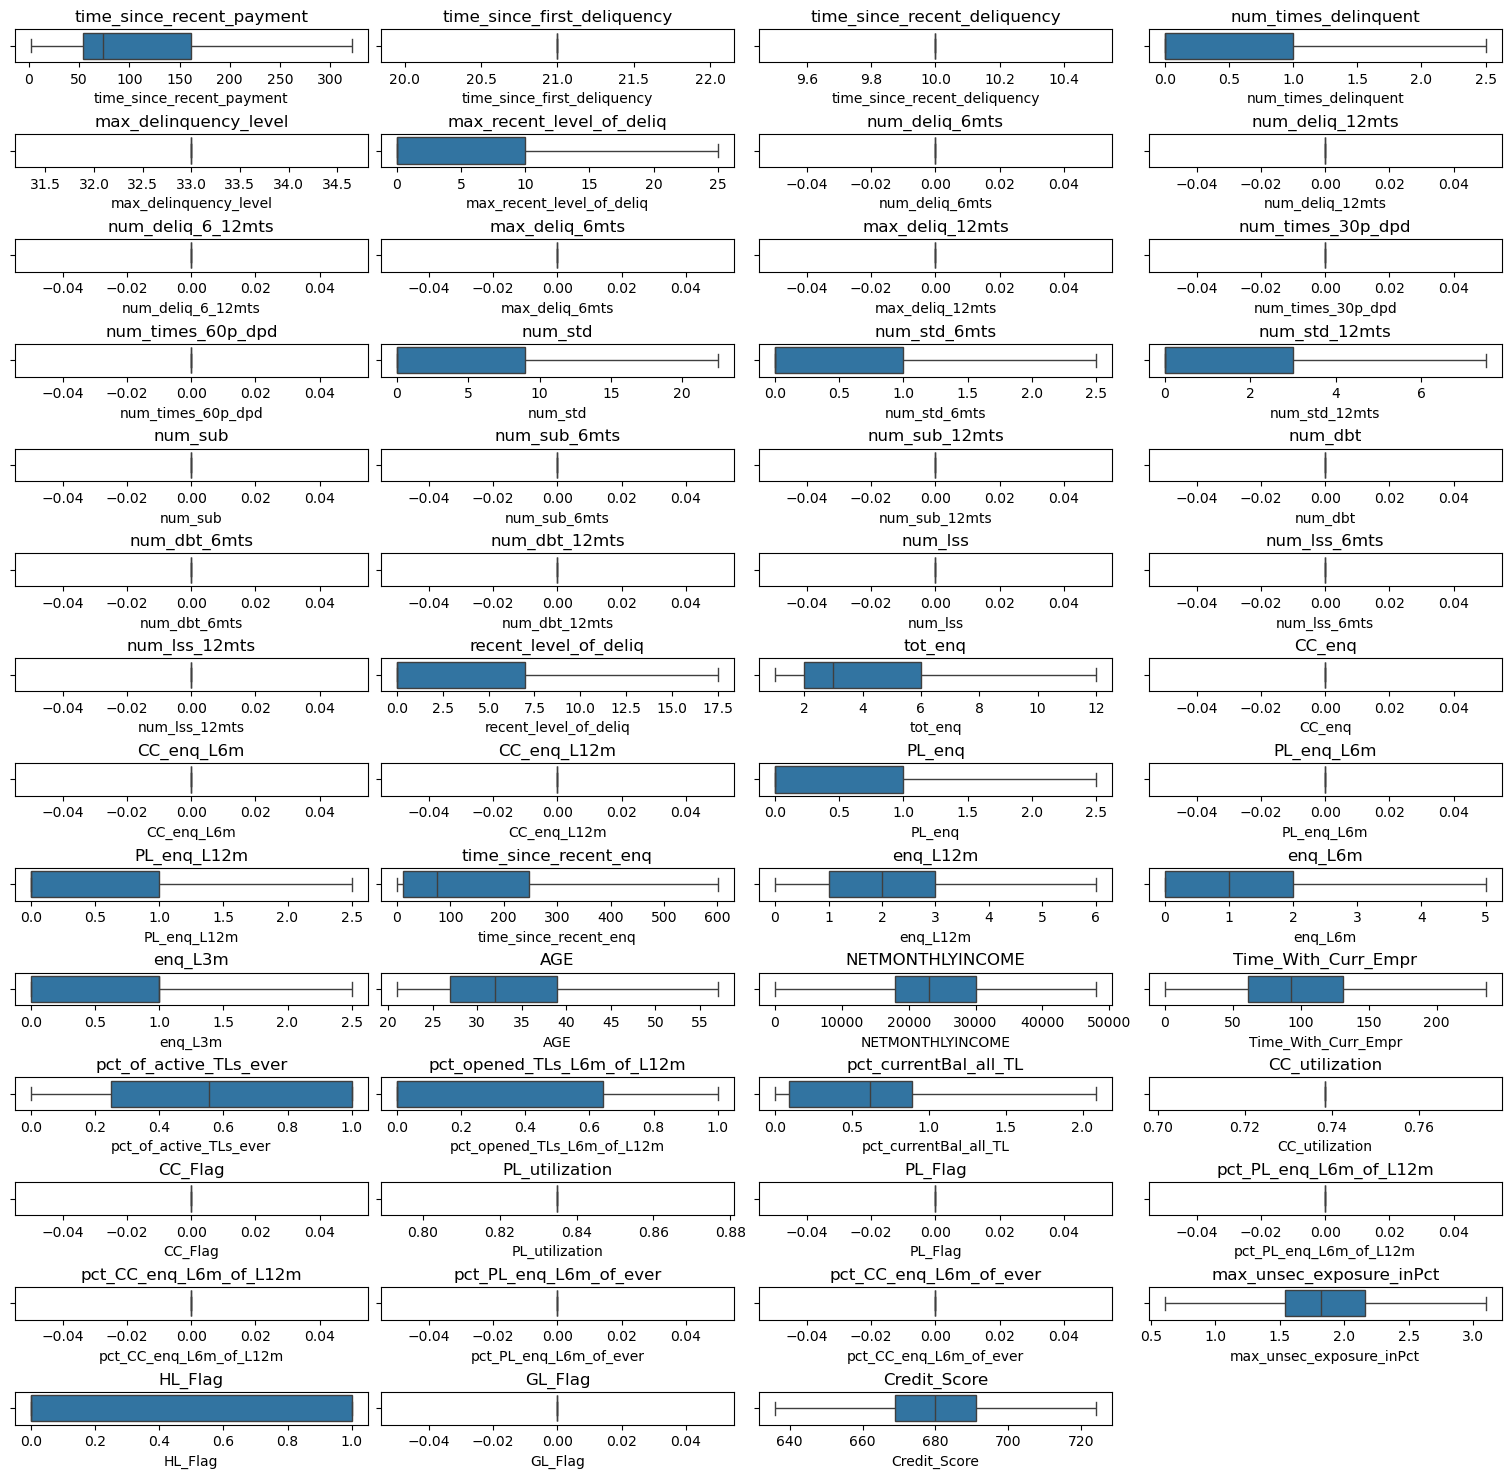

In [65]:

plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(numeric_cols)):
       plt.subplot(15,4,i+1)
       sns.boxplot(data=data,x=numeric_cols[i])
       plt.title(numeric_cols[i])
plt.show()

# Encoding

In [8]:
edu_map = {'SSC': 1,'12TH': 2,'UNDER GRADUATE': 3,'GRADUATE': 4,'POST-GRADUATE': 5,'PROFESSIONAL': 6,'OTHERS': 0}
data['EDUCATION'] = data['EDUCATION'].map(edu_map)

In [9]:
data['EDUCATION']

0        2
1        4
2        1
3        1
4        5
        ..
51331    2
51332    1
51333    1
51334    3
51335    1
Name: EDUCATION, Length: 51336, dtype: int64

In [10]:
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"column:{col}")
    print(data[col].unique())
    print("-"*50)

column:MARITALSTATUS
['Married' 'Single']
--------------------------------------------------
column:GENDER
['M' 'F']
--------------------------------------------------
column:last_prod_enq2
['PL' 'ConsumerLoan' 'others' 'AL' 'CC' 'HL']
--------------------------------------------------
column:first_prod_enq2
['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']
--------------------------------------------------
column:Approved_Flag
['P2' 'P1' 'P3' 'P4']
--------------------------------------------------


In [11]:
encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    encoders[column] = le

In [77]:
for col in data.columns:
    print(f"column:{col}")
    print(data[col].unique())
    print("-"*50)

column:PROSPECTID
[    1     2     3 ... 51334 51335 51336]
--------------------------------------------------
column:time_since_recent_payment
[ 549.   47.  302. ... 1621. 2382. 2383.]
--------------------------------------------------
column:time_since_first_deliquency
[35. 21. 11. 27. 23.  7. 24. 30.  8. 34. 32. 29. 15. 28. 33. 31.  5. 25.
  9. 18. 22. 14. 20.  6. 26.  3. 17. 12. 10. 16.  2.  4. 19. 13.  0.  1.]
--------------------------------------------------
column:time_since_recent_deliquency
[15. 10.  3. 18. 12.  4. 24. 11.  7.  8. 34.  6. 31. 21. 14. 28. 32.  5.
 25. 33.  9.  2. 16. 22. 30. 26. 13.  1. 17. 27. 29. 20. 19. 23.  0. 35.]
--------------------------------------------------
column:num_times_delinquent
[11  0  9 14  3  1  8 10  4  2  5 18 16 13  7  6 22 20 12 15 57 21 17 34
 31 33 28 35 26 27 39 23 19 36 30 61 49 32 25 24 29 42 63 50 55 62 41 43
 52 37 58 54 38 65 48 47 40 66 67 53 45 51 46 74]
--------------------------------------------------
column:max_delinquenc

# Split Featuters and Target(x & y)

In [12]:
x = data.drop("Approved_Flag",axis=1)
y = data["Approved_Flag"]

In [72]:
x

,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,...,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Credit_Score
0,321.5,21.0,10.0,2.5,33.0,25,0,0,0,0.0,...,0.0,0.0,0.0,0.0,3.097625,1,0,4,4,696
1,47.0,21.0,10.0,0.0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.860000,0,0,2,2,685
2,302.0,21.0,10.0,2.5,33.0,25,0,0,0,0.0,...,0.0,0.0,0.0,0.0,3.097625,1,0,2,5,693
3,74.0,21.0,10.0,0.0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,3.097625,0,0,5,5,673
4,321.5,21.0,10.0,0.0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.820000,0,0,0,0,724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51331,15.0,21.0,10.0,2.0,33.0,24,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.661000,0,0,2,2,650
51332,57.0,21.0,10.0,0.0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.608625,0,0,5,5,702
51333,32.0,21.0,10.0,0.0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.608625,0,0,2,5,661
51334,58.0,21.0,10.0,0.0,33.0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.202000,0,0,2,5,686


In [140]:
y

0        1
1        1
2        1
3        1
4        0
        ..
51331    3
51332    0
51333    2
51334    1
51335    1
Name: Approved_Flag, Length: 51336, dtype: int64

# Train Test Split 

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Feature Scaling

In [74]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [97]:
x_train

array([[-0.48482357,  0.03133147, -0.14908   , ...,  1.00752173,
         0.78750505, -0.53504789],
       [-0.44471352,  0.20033425,  2.10452291, ...,  1.00752173,
        -1.64775969, -0.72989913],
       [-0.36449343,  0.03133147, -0.14908   , ..., -0.93774441,
         0.78750505, -1.46059127],
       ...,
       [-0.29095835, -0.98268517,  0.78992122, ..., -0.93774441,
        -1.0389435 ,  0.9750492 ],
       [-0.38232012,  0.03133147, -0.14908   , ..., -0.93774441,
        -1.0389435 , -0.0966326 ],
       [-0.35558009,  1.38335367,  2.29232316, ...,  0.35909968,
        -1.0389435 , -1.1196016 ]])

# Logistic Regression

Test accuracy: 0.9563664697097591
train accuracy: 0.9580075135661611
classification report for logistic regression model:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1712
           1       0.95      0.99      0.97      9637
           2       0.94      0.78      0.85      2278
           3       0.99      1.00      0.99      1774

    accuracy                           0.96     15401
   macro avg       0.97      0.93      0.95     15401
weighted avg       0.96      0.96      0.95     15401



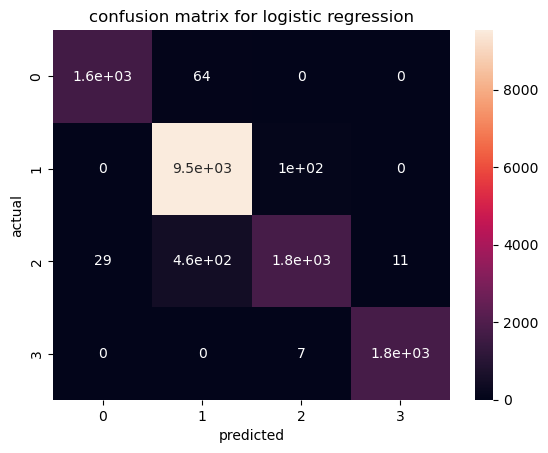

In [109]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
log_pred=lr.predict(x_test)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))

log_report = classification_report(y_test,log_pred)
print("classification report for logistic regression model:")
print(log_report)

log_cm = confusion_matrix(y_test,log_pred)
sns.heatmap(log_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for logistic regression")
plt.show()
lra=accuracy_score(y_test,log_pred)*100

# Dicision Tree

Test accuracy: 0.9944808778650737
train accuracy: 1.0
classification report for dt model
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1712
           1       1.00      1.00      1.00      9637
           2       0.98      0.99      0.98      2278
           3       1.00      1.00      1.00      1774

    accuracy                           0.99     15401
   macro avg       0.99      0.99      0.99     15401
weighted avg       0.99      0.99      0.99     15401



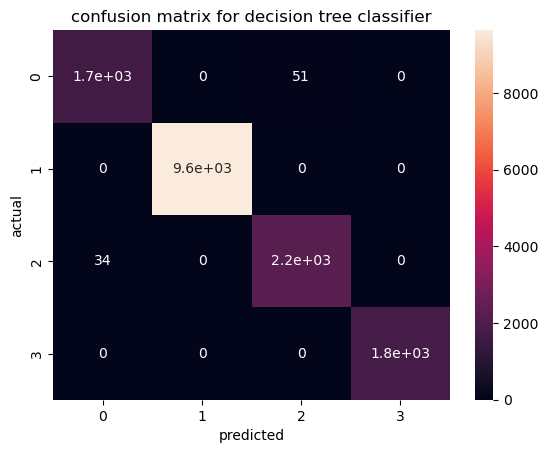

In [111]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
dt_pred = dt_model.predict(x_test)

print('Test accuracy:',dt_model.score(x_test,y_test))
print('train accuracy:',dt_model.score(x_train,y_train))
dt_report = classification_report(y_test, dt_pred)
print("classification report for dt model")
print(dt_report)

dt_cm = confusion_matrix(y_test,dt_pred)
sns.heatmap(dt_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for decision tree classifier")
plt.show()
dta=accuracy_score(y_test,dt_pred)*100

# Random Forest

Test accuracy: 0.9779235114602948
train accuracy: 0.9981633504939474
classification report for rf model
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1712
           1       0.99      1.00      0.99      9637
           2       0.95      0.92      0.94      2278
           3       0.98      0.96      0.97      1774

    accuracy                           0.98     15401
   macro avg       0.97      0.96      0.96     15401
weighted avg       0.98      0.98      0.98     15401



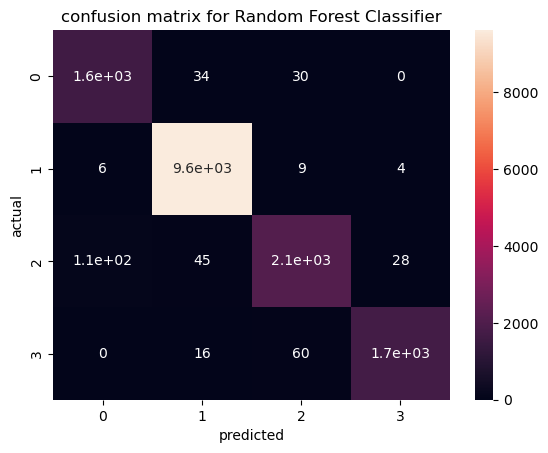

In [114]:
rf_model = RandomForestClassifier(n_estimators=5,random_state=10)
rf_model.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

print('Test accuracy:',rf_model.score(x_test,y_test))
print('train accuracy:',rf_model.score(x_train,y_train))
rf_report = classification_report(y_test, rf_pred)
print("classification report for rf model")
print(rf_report)

rf_cm = confusion_matrix(y_test,rf_pred)
sns.heatmap(rf_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for Random Forest Classifier")
plt.show()
rfa=accuracy_score(y_test,rf_pred)*100

# Adaboost

Test accuracy: 0.7626128173495228
train accuracy: 0.7601780993460414
classification report for ada boost classifier model
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1712
           1       0.84      1.00      0.91      9637
           2       0.54      0.93      0.68      2278
           3       0.00      0.00      0.00      1774

    accuracy                           0.76     15401
   macro avg       0.34      0.48      0.40     15401
weighted avg       0.60      0.76      0.67     15401



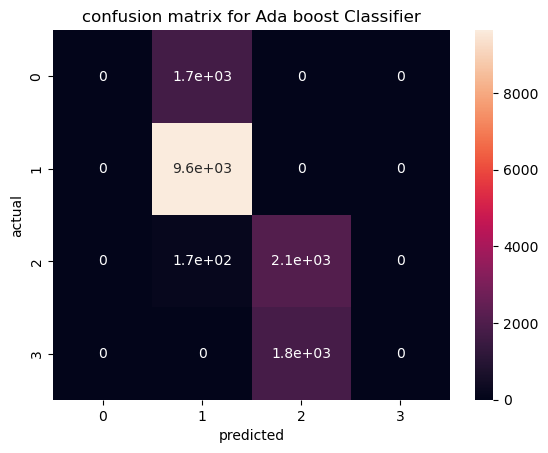

In [115]:
ada_model = AdaBoostClassifier(n_estimators=5,estimator=None,random_state=5,learning_rate=.2)
ada_model.fit(x_train,y_train)
ada_pred = ada_model.predict(x_test)

print('Test accuracy:',ada_model.score(x_test,y_test))
print('train accuracy:',ada_model.score(x_train,y_train))
ada_report = classification_report(y_test, ada_pred)
print("classification report for ada boost classifier model")
print(ada_report)

ada_cm = confusion_matrix(y_test,ada_pred)
sns.heatmap(ada_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for Ada boost Classifier")
plt.show()
ac=accuracy_score(y_test,ada_pred)*100

# Gradiant Boosting

Test accuracy: 0.9951301863515356
train accuracy: 0.9961875608737999
classification report for Gradient Boosting classifier model
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1712
           1       1.00      1.00      1.00      9637
           2       0.97      1.00      0.98      2278
           3       1.00      1.00      1.00      1774

    accuracy                           1.00     15401
   macro avg       0.99      0.99      0.99     15401
weighted avg       1.00      1.00      1.00     15401



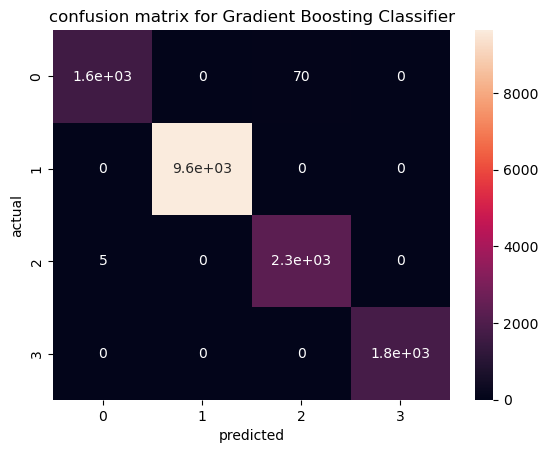

In [116]:
gb_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gb_model.fit(x_train,y_train)
gb_pred = gb_model.predict(x_test)

print('Test accuracy:',gb_model.score(x_test,y_test))
print('train accuracy:',gb_model.score(x_train,y_train))
gr_report = classification_report(y_test, gb_pred)
print("classification report for Gradient Boosting classifier model")
print(gr_report)

gb_cm = confusion_matrix(y_test,gb_pred)
sns.heatmap(gb_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for Gradient Boosting Classifier")
plt.show()
gbca=accuracy_score(y_test,gb_pred)*100

# Support vector Machine

Test accuracy: 0.9344847737159925
train accuracy: 0.9602615834144984
classification report for Support vector Machine classifier model
              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1712
           1       0.94      0.98      0.96      9637
           2       0.86      0.76      0.81      2278
           3       0.95      0.90      0.92      1774

    accuracy                           0.93     15401
   macro avg       0.93      0.89      0.91     15401
weighted avg       0.93      0.93      0.93     15401



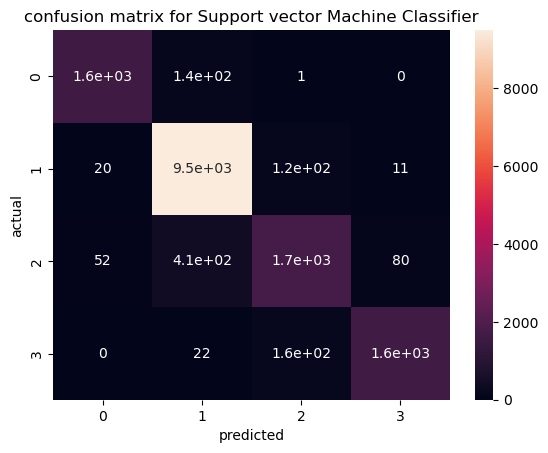

In [117]:
sv_model = SVC()
sv_model.fit(x_train,y_train)
sv_pred = sv_model.predict(x_test)

print('Test accuracy:',sv_model.score(x_test,y_test))
print('train accuracy:',sv_model.score(x_train,y_train))
sv_report = classification_report(y_test, sv_pred)
print("classification report for Support vector Machine classifier model")
print(sv_report)

sv_cm = confusion_matrix(y_test,sv_pred)
sns.heatmap(sv_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for Support vector Machine Classifier")
plt.show()
sva=accuracy_score(y_test,sv_pred)*100

# KNN

Test accuracy: 0.7453412116096357
train accuracy: 0.81825518296925
classification report for K-Nearest Neighbors classifier model
              precision    recall  f1-score   support

           0       0.77      0.54      0.64      1712
           1       0.78      0.92      0.84      9637
           2       0.44      0.29      0.35      2278
           3       0.77      0.58      0.66      1774

    accuracy                           0.75     15401
   macro avg       0.69      0.58      0.62     15401
weighted avg       0.73      0.75      0.73     15401



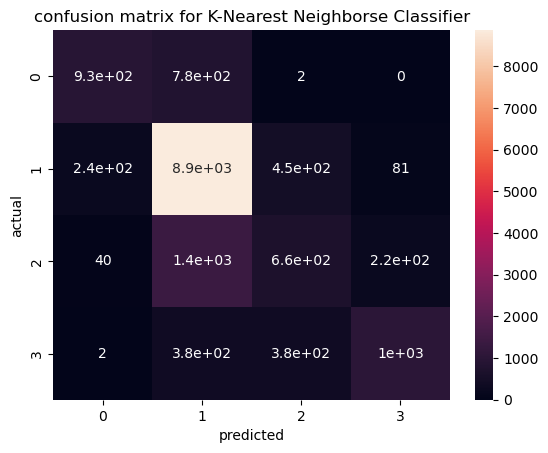

In [118]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)
knn_pred = knn_model.predict(x_test)

print('Test accuracy:',knn_model.score(x_test,y_test))
print('train accuracy:',knn_model.score(x_train,y_train))
knn_report = classification_report(y_test, knn_pred)
print("classification report for K-Nearest Neighbors classifier model")
print(knn_report)

knn_cm = confusion_matrix(y_test,knn_pred)
sns.heatmap(knn_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for K-Nearest Neighborse Classifier")
plt.show()
kc=accuracy_score(y_test,knn_pred)*100

# Naive bayes (GaussianNB)

Test accuracy: 0.2337510551262905
train accuracy: 0.23447892027271464
classification report for Gaussian Naive bayes classifier model
              precision    recall  f1-score   support

           0     0.6834    0.4299    0.5278      1712
           1     0.7921    0.0083    0.0164      9637
           2     0.1534    0.8385    0.2593      2278
           3     0.4943    0.4927    0.4935      1774

    accuracy                         0.2338     15401
   macro avg     0.5308    0.4423    0.3243     15401
weighted avg     0.6512    0.2338    0.1641     15401



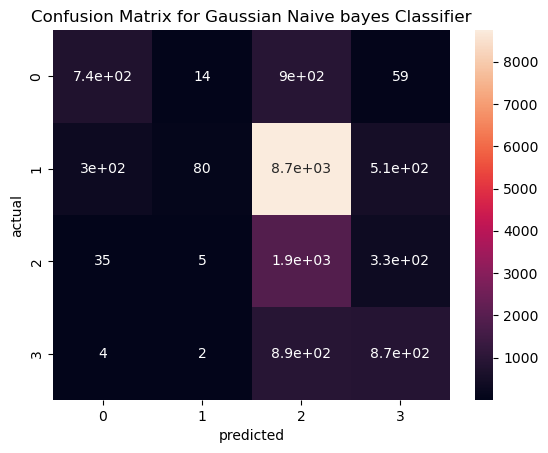

In [119]:
gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)
gnb_pred = gnb_model.predict(x_test)

print('Test accuracy:',gnb_model.score(x_test,y_test))
print('train accuracy:',gnb_model.score(x_train,y_train))
gnb_report = classification_report(y_test,gnb_pred, digits=4)
print("classification report for Gaussian Naive bayes classifier model")
print(gnb_report)

gnb_cm = confusion_matrix(y_test,gnb_pred)
sns.heatmap(gnb_cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("Confusion Matrix for Gaussian Naive bayes Classifier")
plt.show()
nb=accuracy_score(y_test,gnb_pred)*100

# INTIAL PERFORMANCE

After training multiple classification models on the loan approval dataset, the accuracy of each model was evaluated. 
The goal was to identify which model performs best before applying tuning or advanced techniques.

In [120]:
tb=pd.DataFrame()
tb['model']=pd.Series(['Logistic Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boosting','Knn','SVC','GaussianNB'])
tb['accuracy']=pd.Series([lra,dta,rfa,ac,gbca,sva,kc,nb])
tb

,model,accuracy
0,Logistic Regression,95.636647
1,Decision Tree,99.448088
2,Random Forest,97.792351
3,Ada Boost,76.261282
4,Gradient Boosting,99.513019
5,Knn,93.448477
6,SVC,74.534121
7,GaussianNB,23.375106


# OVER SAMPLING

In [75]:
data.value_counts('Approved_Flag')

Approved_Flag
1    32199
2     7452
3     5882
0     5803
Name: count, dtype: int64

In [13]:
scaler = StandardScaler()
x_new = scaler.fit_transform(x)
x_new

array([[ 1.89600512,  0.        ,  0.        , ...,  0.36279371,
         0.17873506,  0.8731773 ],
       [-0.73630431,  0.        ,  0.        , ..., -0.93421369,
        -1.0403632 ,  0.27758478],
       [ 1.70901046,  0.        ,  0.        , ..., -0.93421369,
         0.78828419,  0.71074298],
       ...,
       [-0.88014636,  0.        ,  0.        , ..., -0.93421369,
         0.78828419, -1.0218898 ],
       [-0.63082015,  0.        ,  0.        , ..., -0.93421369,
         0.78828419,  0.33172956],
       [-0.47738863,  0.        ,  0.        , ...,  1.01129741,
         0.78828419,  0.06100569]])

In [14]:
over = SMOTE(random_state=2)
x_os,y_os = over.fit_resample(x_new,y)
print(y_os.value_counts())

Approved_Flag
1    32199
0    32199
2    32199
3    32199
Name: count, dtype: int64


In [15]:
x_train_1,x_test_1,y_train_1,y_test_1=train_test_split(x_os,y_os,test_size=0.3,random_state=2)

### Logistic regression (after SMOTE)

Test accuracy: 0.94544372266363
train accuracy: 0.9437869494326564
classification report for logistic regression model after SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9686
           1       0.93      0.87      0.90      9786
           2       0.88      0.92      0.90      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.95     38639
   macro avg       0.95      0.95      0.95     38639
weighted avg       0.95      0.95      0.95     38639



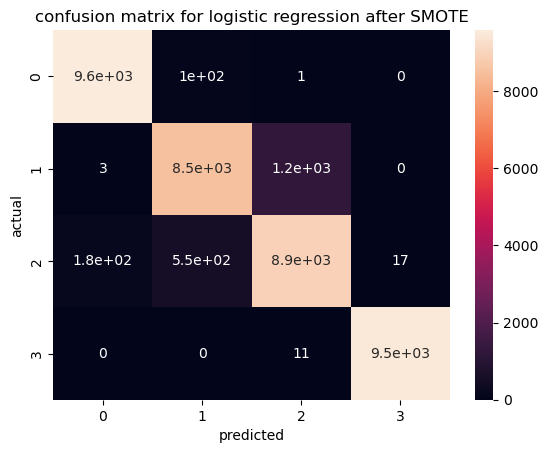

In [102]:
lr_1=LogisticRegression()
lr_1.fit(x_train_1,y_train_1)
log_pred_1=lr_1.predict(x_test_1)
print('Test accuracy:',lr_1.score(x_test_1,y_test_1))
print('train accuracy:',lr_1.score(x_train_1,y_train_1))

log_report_1 = classification_report(y_test_1,log_pred_1)
print("classification report for logistic regression model after SMOTE:")
print(log_report_1)

log_cm_1 = confusion_matrix(y_test_1,log_pred_1)
sns.heatmap(log_cm_1,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for logistic regression after SMOTE")
plt.show()
lra_1=accuracy_score(y_test_1,log_pred_1)*100

### DecisionTree(after SMOTE)

Test accuracy: 0.993788659126789
train accuracy: 1.0
classification report for dt model after SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9686
           1       0.99      1.00      0.99      9786
           2       0.99      0.99      0.99      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.99     38639
   macro avg       0.99      0.99      0.99     38639
weighted avg       0.99      0.99      0.99     38639



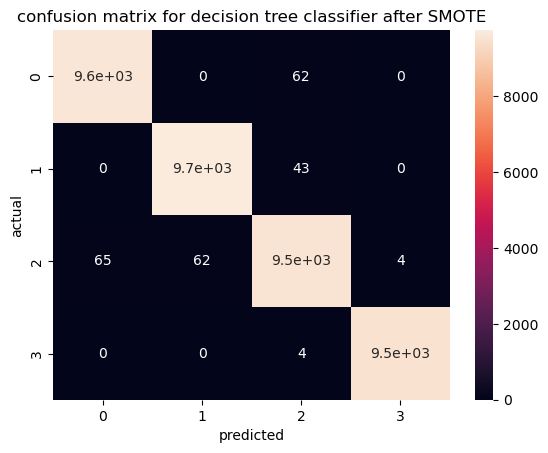

In [16]:
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(x_train_1,y_train_1)
dt_pred_1 = dt_model_1.predict(x_test_1)

print('Test accuracy:',dt_model_1.score(x_test_1,y_test_1))
print('train accuracy:',dt_model_1.score(x_train_1,y_train_1))
dt_report_1 = classification_report(y_test_1, dt_pred_1)
print("classification report for dt model after SMOTE:")
print(dt_report_1)

dt_cm_1 = confusion_matrix(y_test_1,dt_pred_1)
sns.heatmap(dt_cm_1,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for decision tree classifier after SMOTE")
plt.show()
dta_1=accuracy_score(y_test_1,dt_pred_1)*100

### Random Forest(after SMOTE)

Test accuracy: 0.983436424338104
train accuracy: 0.9985358873964306
classification report for rf model after SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9686
           1       0.97      0.99      0.98      9786
           2       0.98      0.97      0.97      9674
           3       1.00      0.99      1.00      9493

    accuracy                           0.98     38639
   macro avg       0.98      0.98      0.98     38639
weighted avg       0.98      0.98      0.98     38639



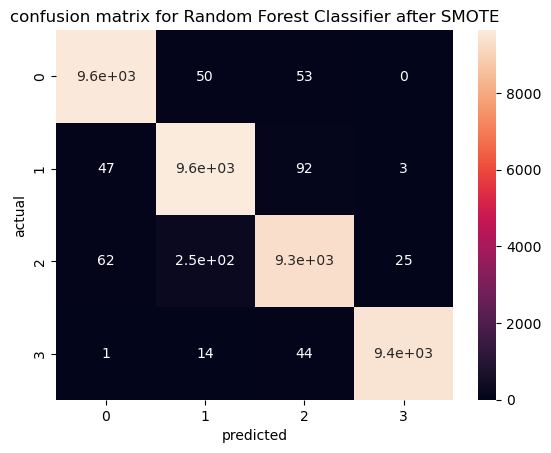

In [104]:
rf_model_1 = RandomForestClassifier(n_estimators=5,random_state=10)
rf_model_1.fit(x_train_1,y_train_1)
rf_pred_1 = rf_model_1.predict(x_test_1)

print('Test accuracy:',rf_model_1.score(x_test_1,y_test_1))
print('train accuracy:',rf_model_1.score(x_train_1,y_train_1))
rf_report_1 = classification_report(y_test_1,rf_pred_1)
print("classification report for rf model after SMOTE:")
print(rf_report_1)

rf_cm_1 = confusion_matrix(y_test_1,rf_pred_1)
sns.heatmap(rf_cm_1,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for Random Forest Classifier after SMOTE")
plt.show()
rfa_1=accuracy_score(y_test_1,rf_pred_1)*100

### AdaBoost(after SMOTE)

Test accuracy: 0.49592380755195525
train accuracy: 0.5016027596304224
classification report for ada boost classifier model after SMOTE
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9686
           1       0.00      0.00      0.00      9786
           2       0.33      1.00      0.50      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.50     38639
   macro avg       0.33      0.50      0.37     38639
weighted avg       0.33      0.50      0.37     38639



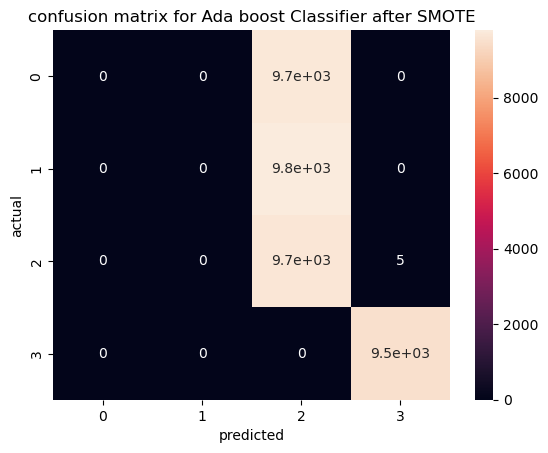

In [105]:
ada_model_1 = AdaBoostClassifier(n_estimators=5,estimator=None,random_state=5,learning_rate=.2)
ada_model_1.fit(x_train_1,y_train_1)
ada_pred_1 = ada_model_1.predict(x_test_1)

print('Test accuracy:',ada_model_1.score(x_test_1,y_test_1))
print('train accuracy:',ada_model_1.score(x_train_1,y_train_1))
ada_report_1 = classification_report(y_test_1, ada_pred_1)
print("classification report for ada boost classifier model after SMOTE")
print(ada_report_1)

ada_cm_1 = confusion_matrix(y_test_1,ada_pred_1)
sns.heatmap(ada_cm_1,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for Ada boost Classifier after SMOTE")
plt.show()
ac_1=accuracy_score(y_test_1,ada_pred_1)*100

### Gradient Boosting(after SMOTE)

Test accuracy: 0.9909417945599006
train accuracy: 0.9921026653504442
classification report for Gradient Boosting classifier model after SMOTE
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9686
           1       0.98      1.00      0.99      9786
           2       0.98      0.98      0.98      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.99     38639
   macro avg       0.99      0.99      0.99     38639
weighted avg       0.99      0.99      0.99     38639



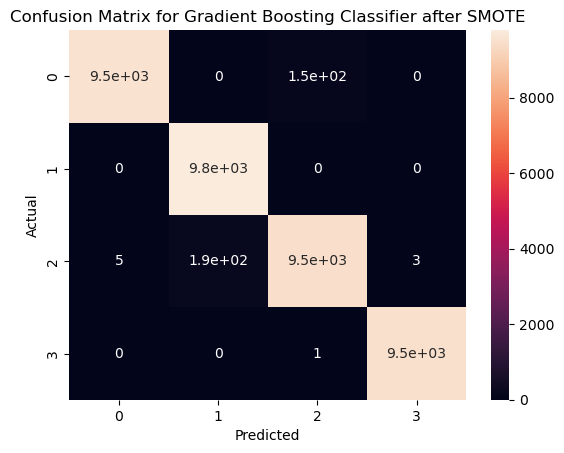

In [106]:
gb_model_1 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gb_model_1.fit(x_train_1,y_train_1)
gb_pred_1 = gb_model_1.predict(x_test_1)

print('Test accuracy:',gb_model_1.score(x_test_1,y_test_1))
print('train accuracy:',gb_model_1.score(x_train_1,y_train_1))
gr_report_1 = classification_report(y_test_1, gb_pred_1)
print("classification report for Gradient Boosting classifier model after SMOTE")
print(gr_report_1)

gb_cm_1 = confusion_matrix(y_test_1,gb_pred_1)
sns.heatmap(gb_cm_1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boosting Classifier after SMOTE")
plt.show()
gbca_1=accuracy_score(y_test_1,gb_pred_1)*100

### SVC (after SMOTE)

Test accuracy: 0.9577887626491369
Train accuracy: 0.9638186718724003
Classification Report for Support vector Machine classifier model after SMOTE
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9686
           1       0.97      0.93      0.95      9786
           2       0.93      0.91      0.92      9674
           3       0.99      0.99      0.99      9493

    accuracy                           0.96     38639
   macro avg       0.96      0.96      0.96     38639
weighted avg       0.96      0.96      0.96     38639



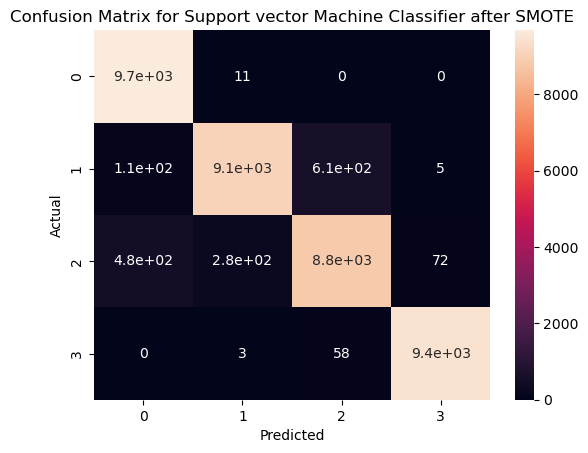

In [107]:
sv_model_1 = SVC()
sv_model_1.fit(x_train_1,y_train_1)
sv_pred_1 = sv_model_1.predict(x_test_1)

print('Test accuracy:',sv_model_1.score(x_test_1,y_test_1))
print('Train accuracy:',sv_model_1.score(x_train_1,y_train_1))
sv_report_1 = classification_report(y_test_1, sv_pred_1)
print("Classification Report for Support vector Machine classifier model after SMOTE")
print(sv_report_1)

sv_cm_1 = confusion_matrix(y_test_1,sv_pred_1)
sns.heatmap(sv_cm_1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Support vector Machine Classifier after SMOTE")
plt.show()
sva_1=accuracy_score(y_test_1,sv_pred_1)*100

### KNN (after SMOTE)

Test accuracy: 0.8781541965371774
Train accuracy: 0.91837572235101
Classification Report for K-Nearest Neighbors classifier model after SMOTE
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      9686
           1       0.95      0.63      0.75      9786
           2       0.79      0.93      0.85      9674
           3       0.93      0.97      0.95      9493

    accuracy                           0.88     38639
   macro avg       0.89      0.88      0.87     38639
weighted avg       0.89      0.88      0.87     38639



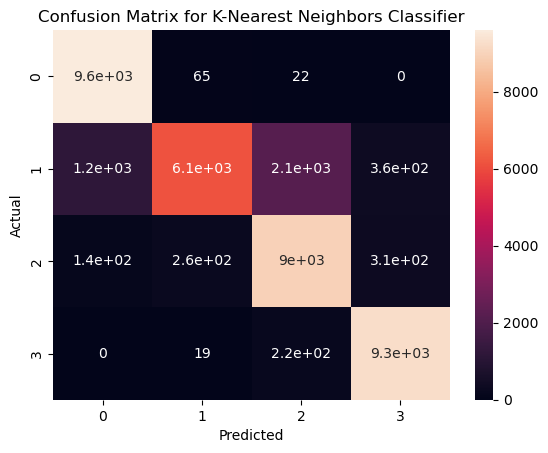

In [122]:
knn_model_1 = KNeighborsClassifier(n_neighbors=5)
knn_model_1.fit(x_train_1,y_train_1)
knn_pred_1 = knn_model_1.predict(x_test_1)

print('Test accuracy:',knn_model_1.score(x_test_1,y_test_1))
print('Train accuracy:',knn_model_1.score(x_train_1,y_train_1))
knn_report_1 = classification_report(y_test_1, knn_pred_1)
print("Classification Report for K-Nearest Neighbors classifier model after SMOTE")
print(knn_report_1)

knn_cm_1 = confusion_matrix(y_test_1,knn_pred_1)
sns.heatmap(knn_cm_1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier")
plt.show()
kc_1=accuracy_score(y_test_1,knn_pred_1)*100

### Gaussian Naive bayes (after SMOTE)

Test accuracy: 0.5214679468930355
Train accuracy: 0.5251394789090142
Classification Report for Gaussian Naive bayes classifier model after SMOTE
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      9686
           1       0.72      0.23      0.35      9786
           2       0.34      0.09      0.15      9674
           3       0.39      0.97      0.55      9493

    accuracy                           0.52     38639
   macro avg       0.58      0.52      0.47     38639
weighted avg       0.58      0.52      0.47     38639



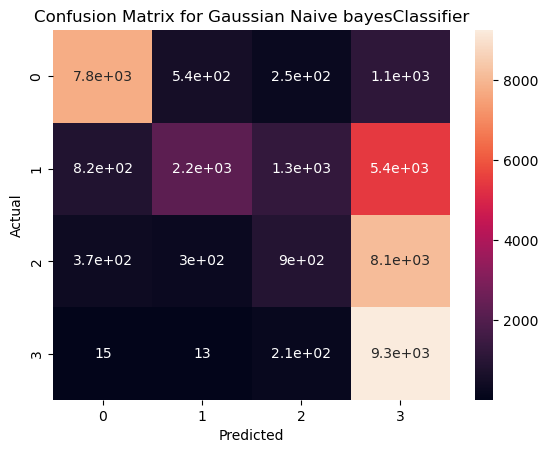

In [123]:
gnb_model_1 = GaussianNB()
gnb_model_1.fit(x_train_1,y_train_1)
gnb_pred_1 = gnb_model_1.predict(x_test_1)

print('Test accuracy:',gnb_model_1.score(x_test_1,y_test_1))
print('Train accuracy:',gnb_model_1.score(x_train_1,y_train_1))
gnb_report_1 = classification_report(y_test_1,gnb_pred_1)
print("Classification Report for Gaussian Naive bayes classifier model after SMOTE")
print(gnb_report_1)

gnb_cm_1 = confusion_matrix(y_test_1,gnb_pred_1)
sns.heatmap(gnb_cm_1,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gaussian Naive bayesClassifier")
plt.show()
nb_1=accuracy_score(y_test_1,gnb_pred_1)*100

# Performance after SMOTE

In [124]:
df=pd.DataFrame()
df['model']=pd.Series(['Logistic Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boosting','Knn','SVC','GaussianNB'])
df['accuracy']=pd.Series([lra,dta,rfa,ac,gbca,sva,kc,nb])
df['Accuracy_after_SMOTE']=pd.Series([lra_1,dta_1,rfa_1,ac_1,gbca_1,sva_1,kc_1,nb_1])
df

,model,accuracy,Accuracy_after_SMOTE
0,Logistic Regression,95.636647,94.544372
1,Decision Tree,99.448088,99.402158
2,Random Forest,97.792351,98.343642
3,Ada Boost,76.261282,49.592381
4,Gradient Boosting,99.513019,99.094179
5,Knn,93.448477,95.778876
6,SVC,74.534121,87.815420
7,GaussianNB,23.375106,52.146795


# HyperParameter Tuning

### Tuning in Logistic Regression

In [26]:
par={'C':[0.1,1,10,100]}
lrt=GridSearchCV(lr_1,par,cv=10,scoring='accuracy')
lrt.fit(x_train_1,y_train_1)
print(lrt.best_params_)

{'C': 10}


Test accuracy: 0.9450555138590543
train accuracy: 0.9437980411948046
classification report for logistic regression model after Tuning:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      9686
           1       0.92      0.87      0.90      9786
           2       0.88      0.92      0.90      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.95     38639
   macro avg       0.95      0.95      0.95     38639
weighted avg       0.95      0.95      0.94     38639



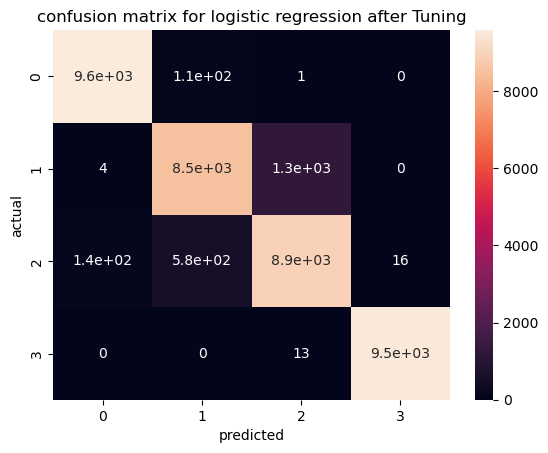

In [148]:
lr_2=LogisticRegression(C=10)
lr_2.fit(x_train_1,y_train_1)
log_pred_2=lr_2.predict(x_test_1)

log_test = lr_2.score(x_test_1,y_test_1)
log_train = lr_2.score(x_train_1,y_train_1)

print('Test accuracy:',log_test)
print('train accuracy:',log_train)

log_report_2 = classification_report(y_test_1,log_pred_2)
print("classification report for logistic regression model after Tuning:")
print(log_report_2)

log_cm_2 = confusion_matrix(y_test_1,log_pred_2)
sns.heatmap(log_cm_2,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for logistic regression after Tuning")
plt.show()
lra_2=accuracy_score(y_test_1,log_pred_2)*100

### Tuning in Dicision Tree

In [30]:
par={'max_depth':[3,5,10],'criterion':['gini','entropy']}
dtt=GridSearchCV(dt_model_1,par,cv=10,scoring='accuracy')
dtt.fit(x_train_1,y_train_1)
print(dtt.best_params_)

{'criterion': 'gini', 'max_depth': 10}


Test accuracy:
Train accuracy:
classification report for dt model after Tuning:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      9686
           1       0.99      1.00      0.99      9786
           2       0.99      0.98      0.99      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.99     38639
   macro avg       0.99      0.99      0.99     38639
weighted avg       0.99      0.99      0.99     38639



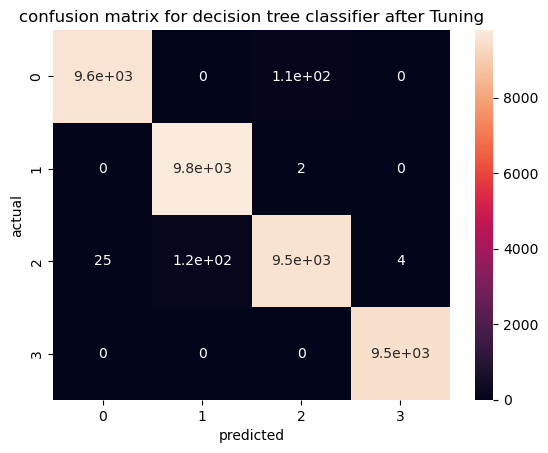

In [17]:
dt_model_2 = DecisionTreeClassifier(criterion='gini',max_depth=10)
dt_model_2.fit(x_train_1,y_train_1)
dt_pred_2 = dt_model_2.predict(x_test_1)

dt_test = dt_model_2.score(x_test_1,y_test_1)
dt_train = dt_model_2.score(x_train_1,y_train_1)

print('Test accuracy:',)
print('Train accuracy:',)

dt_report_2 = classification_report(y_test_1, dt_pred_2)
print("classification report for dt model after Tuning:")
print(dt_report_2)

dt_cm_2 = confusion_matrix(y_test_1,dt_pred_2)
sns.heatmap(dt_cm_2,annot=True)
plt.xlabel("predicted")
plt.ylabel("actual")
plt.title("confusion matrix for decision tree classifier after Tuning")
plt.show()
dta_2=accuracy_score(y_test_1,dt_pred_2)*100

### Tuning in Random Forest

In [125]:
par={'max_depth':['None',10,20,30],'n_estimators':[1,5,10]}
rft=GridSearchCV(rf_model_1,par,cv=10,scoring='accuracy')
rft.fit(x_train_1,y_train_1)
print(rft.best_params_)

{'max_depth': 20, 'n_estimators': 10}


Test accuracy: 0.9899065710810321
Train accuracy: 0.9995674212762181
Classification Report for rf model after Tuning:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9686
           1       0.98      1.00      0.99      9786
           2       0.99      0.98      0.98      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.99     38639
   macro avg       0.99      0.99      0.99     38639
weighted avg       0.99      0.99      0.99     38639



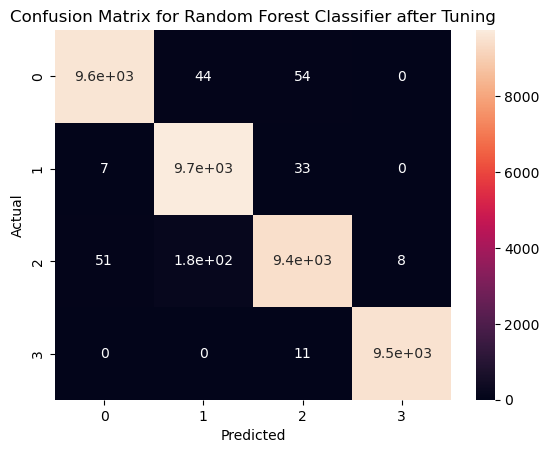

In [141]:
rf_model_2 = RandomForestClassifier(max_depth=20,n_estimators=10,random_state=10)
rf_model_2.fit(x_train_1,y_train_1)
rf_pred_2 = rf_model_2.predict(x_test_1)

rf_test = rf_model_2.score(x_test_1,y_test_1)
rf_train = rf_model_2.score(x_train_1,y_train_1)

print('Test accuracy:',rf_test)
print('Train accuracy:',rf_train)

rf_report_2 = classification_report(y_test_1,rf_pred_2)
print("Classification Report for rf model after Tuning:")
print(rf_report_2)

rf_cm_2 = confusion_matrix(y_test_1,rf_pred_2)
sns.heatmap(rf_cm_2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Classifier after Tuning")
plt.show()
rfa_2=accuracy_score(y_test_1,rf_pred_2)*100

### Tuning in AdaBoost

In [41]:
par={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0,0.2]}
adt=GridSearchCV(ada_model_1,par,cv=10,scoring='accuracy')
adt.fit(x_train_1,y_train_1)
print(adt.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


Test accuracy: 0.7423587566966019
train accuracy: 0.7473962088356977
classification report for ada boost classifier model after Tuning
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9686
           1       0.00      0.00      0.00      9786
           2       0.33      1.00      0.50      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.50     38639
   macro avg       0.33      0.50      0.37     38639
weighted avg       0.33      0.50      0.37     38639



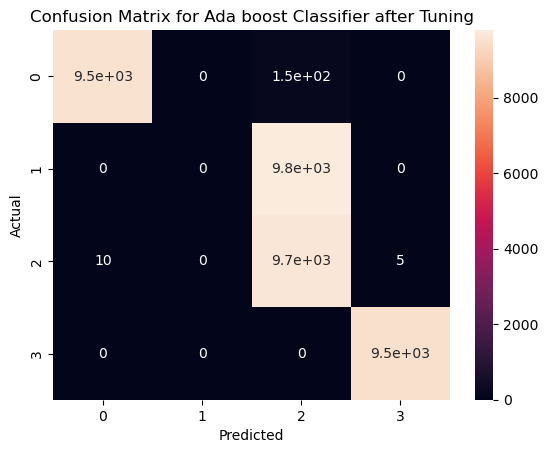

In [150]:
ada_model_2 = AdaBoostClassifier(learning_rate= 0.1, n_estimators=100)
ada_model_2.fit(x_train_1,y_train_1)
ada_pred_2 = ada_model_2.predict(x_test_1)

ada_test = ada_model_2.score(x_test_1,y_test_1)
ada_train = ada_model_2.score(x_train_1,y_train_1)

print('Test accuracy:',ada_test)
print('train accuracy:',ada_train)

ada_report_2 = classification_report(y_test_1, ada_pred_2)
print("classification report for ada boost classifier model after Tuning")
print(ada_report_1)

ada_cm_2 = confusion_matrix(y_test_1,ada_pred_2)
sns.heatmap(ada_cm_2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Ada boost Classifier after Tuning")
plt.show()
ac_2 = accuracy_score(y_test_1,ada_pred_2)*100

### Tuning in Gradient Boosting

In [ ]:
par={'n_estimators':[50,100,150],'max_depth':[4,5,6]}
gbt=GridSearchCV(gb_model_1,par,cv=10,scoring='accuracy')
gbt.fit(x_train_1,y_train_1)
print(gbt.best_params_)

Test accuracy: 0.9909417945599006
train accuracy: 0.9921026653504442
classification report for Gradient Boosting classifier model after Tuning
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      9686
           1       0.98      1.00      0.99      9786
           2       0.98      0.98      0.98      9674
           3       1.00      1.00      1.00      9493

    accuracy                           0.99     38639
   macro avg       0.99      0.99      0.99     38639
weighted avg       0.99      0.99      0.99     38639



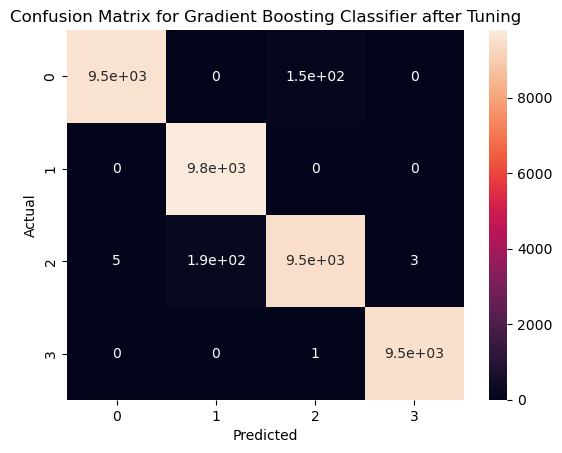

In [152]:
gb_model_2 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gb_model_2.fit(x_train_1,y_train_1)
gb_pred_2 = gb_model_2.predict(x_test_1)

gr_test = gb_model_2.score(x_test_1,y_test_1)
gr_train = gb_model_2.score(x_train_1,y_train_1)
print('Test accuracy:',gr_test)
print('train accuracy:',gr_train)

gr_report_2 = classification_report(y_test_1, gb_pred_2)
print("classification report for Gradient Boosting classifier model after Tuning")
print(gr_report_2)

gb_cm_2 = confusion_matrix(y_test_1,gb_pred_2)
sns.heatmap(gb_cm_2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gradient Boosting Classifier after Tuning")
plt.show()
gbca_2=accuracy_score(y_test_1,gb_pred_2)*100

### Tuning in SVC

In [ ]:
par={'C':[5,10,20],'kernel':['linear','rbf','poly','sigmoid']}
svt=GridSearchCV(sv_model_1,par,cv=10,scoring='accuracy')
svt.fit(x_train_1,y_train_1)
print(svt.best_params_)

In [ ]:
sv_model_2 = SVC()
sv_model_2.fit(x_train_1,y_train_1)
sv_pred_2 = sv_model_2.predict(x_test_1)

sv_test = sv_model_2.score(x_test_1,y_test_1)
sv_train = sv_model_2.score(x_train_1,y_train_1)

print('Test accuracy:',sv_test)
print('Train accuracy:',sv_train)
sv_report_2 = classification_report(y_test_1, sv_pred_2)
print("Classification Report for Support vector Machine classifier model after Tuning")
print(sv_report_2)

sv_cm_2 = confusion_matrix(y_test_1,sv_pred_2)
sns.heatmap(sv_cm_2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Support vector Machine Classifier after Tuning")
plt.show()
sva_2=accuracy_score(y_test_1,sv_pred_2)*100

### Tuning in KNN

In [126]:
par={'n_neighbors':[3,5,27,59,11]}
knt=GridSearchCV(knn_model_1,par,cv=10,scoring='accuracy')
knt.fit(x_train_1,y_train_1)
print(knt.best_params_)

{'n_neighbors': 3}


Test accuracy: 0.8973317114832164
Train accuracy: 0.9443969963508102
Classification Report for K-Nearest Neighbors classifier model after Tuning
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9686
           1       0.96      0.65      0.78      9786
           2       0.82      0.96      0.88      9674
           3       0.95      0.99      0.97      9493

    accuracy                           0.90     38639
   macro avg       0.91      0.90      0.89     38639
weighted avg       0.91      0.90      0.89     38639



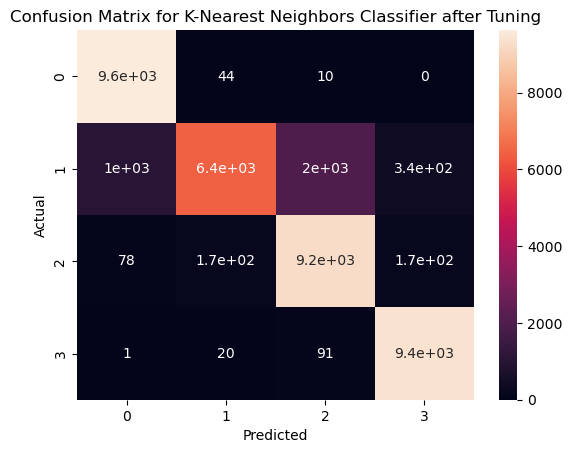

In [154]:
knn_model_2 = KNeighborsClassifier(n_neighbors=3)
knn_model_2.fit(x_train_1,y_train_1)
knn_pred_2 = knn_model_2.predict(x_test_1)

knn_test = knn_model_2.score(x_test_1,y_test_1)
knn_train = knn_model_2.score(x_train_1,y_train_1)

print('Test accuracy:',knn_test)
print('Train accuracy:',knn_train)
knn_report_2 = classification_report(y_test_1, knn_pred_2)
print("Classification Report for K-Nearest Neighbors classifier model after Tuning")
print(knn_report_2)

knn_cm_2 = confusion_matrix(y_test_1,knn_pred_2)
sns.heatmap(knn_cm_2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for K-Nearest Neighbors Classifier after Tuning")
plt.show()
kc_2=accuracy_score(y_test_1,knn_pred_2)*100

### Tuning in Gaussian Naive Bayes

In [28]:
par={'var_smoothing':[1e-9,1e-8,1e-7]}
nbt=GridSearchCV(gnb_model_1,par,cv=10,scoring='accuracy')
nbt.fit(x_train_1,y_train_1)
print(nbt.best_params_)

{'var_smoothing': 1e-09}


Test accuracy: 0.5214679468930355
Train accuracy: 0.5251394789090142
Classification Report for Gaussian Naive bayes classifier model after Tuning
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      9686
           1       0.72      0.23      0.35      9786
           2       0.34      0.09      0.15      9674
           3       0.39      0.97      0.55      9493

    accuracy                           0.52     38639
   macro avg       0.58      0.52      0.47     38639
weighted avg       0.58      0.52      0.47     38639



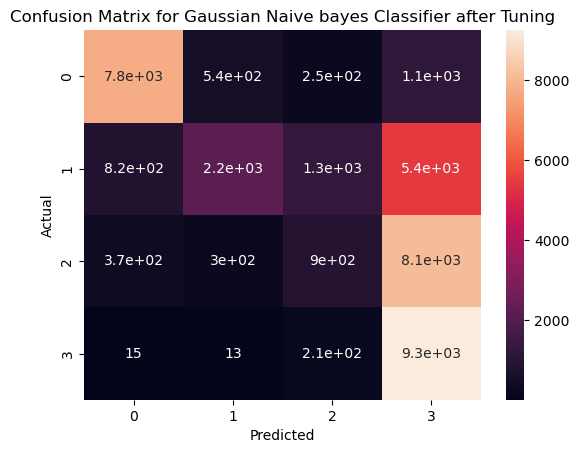

In [156]:
gnb_model_2 = GaussianNB(var_smoothing= 1e-09)
gnb_model_2.fit(x_train_1,y_train_1)
gnb_pred_2 = gnb_model_2.predict(x_test_1)

gnb_test = gnb_model_2.score(x_test_1,y_test_1)
gnb_train = gnb_model_2.score(x_train_1,y_train_1)

print('Test accuracy:',gnb_test)
print('Train accuracy:',gnb_train)
gnb_report_2 = classification_report(y_test_1,gnb_pred_2)
print("Classification Report for Gaussian Naive bayes classifier model after Tuning")
print(gnb_report_2)

gnb_cm_2 = confusion_matrix(y_test_1,gnb_pred_2)
sns.heatmap(gnb_cm_2,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Gaussian Naive bayes Classifier after Tuning")
plt.show()
nb_2=accuracy_score(y_test_1,gnb_pred_2)*100

# Initial Accuracy and Accuracy After HyperParameter Tuning

In [157]:
dp = pd.DataFrame()
dp['model']=pd.Series(['Logistic Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boosting','Knn','SVC','GaussianNB'])
dp['accuracy']=pd.Series([lra,dta,rfa,ac,gbca,sva,kc,nb])
dp['Accuracy_after_SMOTE']=pd.Series([lra_1,dta_1,rfa_1,ac_1,gbca_1,sva_1,kc_1,nb_1])
dp['Accuracy_after_Tuning']=pd.Series([lra_2,dta_2,rfa_2,ac_2,gbca_2,sva_1,kc_2,nb_2])
dp

,model,accuracy,Accuracy_after_SMOTE,Accuracy_after_Tuning
0,Logistic Regression,95.636647,94.544372,94.505551
1,Decision Tree,99.448088,99.402158,99.259815
2,Random Forest,97.792351,98.343642,98.990657
3,Ada Boost,76.261282,49.592381,74.235876
4,Gradient Boosting,99.513019,99.094179,99.094179
5,Knn,93.448477,95.778876,95.778876
6,SVC,74.534121,87.815420,89.733171
7,GaussianNB,23.375106,52.146795,52.146795


# Train test accuracy for each model after tuning

In [162]:
da = pd.DataFrame()
da['model']=pd.Series(['Logistic Regression','Decision Tree','Random Forest','Ada Boost','Gradient Boosting','Knn','GaussianNB'])
da['test accuracy']=pd.Series([log_test,dt_test,rf_test,ada_test,gr_test,knn_test,gnb_test])
da['train accuracy']=pd.Series([log_train,dt_train,rf_train,ada_train,gr_train,knn_train,gnb_train])
da

,model,test accuracy,train accuracy
0,Logistic Regression,0.945056,0.943798
1,Decision Tree,0.992598,0.995086
2,Random Forest,0.989907,0.999567
3,Ada Boost,0.742359,0.747396
4,Gradient Boosting,0.990942,0.992103
5,Knn,0.897332,0.944397
6,GaussianNB,0.521468,0.525139


## After comparing train and test accuracy for all models, the model with the highest test accuracy and the smallest train–test gap was selected as the final model for this project.so here select the "Random Forest model"

In [18]:
prediction = [[27.1,39,6.1,6.3,13.5,5.3,1.15,0.22,33,5,24,567,865,446,34,7623,23,445,345,67,43,34,56,78,234,6545,3345,23,3,56,43,21,34,5,78,90,455,34,23,12,34,987,654,321,234,6,5,32,1,7,2,7,5,3,23,43,56,76,34,3423]]
dt_model_2.predict(prediction)

array([0])

# Save model and Encoding using joblib

In [19]:
import joblib

In [20]:
save_package = {
    "edu_map": edu_map,
    "encoders": encoders,
    "scaler": scaler,
    "model": dt_model_2
}
joblib.dump(save_package, "/Users/mac/Techolas_project/loan_pipeline.pkl")

['/Users/mac/Techolas_project/loan_pipeline.pkl']

In [19]:
len(x.columns)

60

In [20]:
x.columns

Index(['time_since_recent_payment', 'time_since_first_deliquency',
       'time_since_recent_deliquency', 'num_times_delinquent',
       'max_delinquency_level', 'max_recent_level_of_deliq', 'num_deliq_6mts',
       'num_deliq_12mts', 'num_deliq_6_12mts', 'max_deliq_6mts',
       'max_deliq_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std',
       'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'tot_enq',
       'CC_enq', 'CC_enq_L6m', 'CC_enq_L12m', 'PL_enq', 'PL_enq_L6m',
       'PL_enq_L12m', 'time_since_recent_enq', 'enq_L12m', 'enq_L6m',
       'enq_L3m', 'MARITALSTATUS', 'EDUCATION', 'AGE', 'GENDER',
       'NETMONTHLYINCOME', 'Time_With_Curr_Empr', 'pct_of_active_TLs_ever',
       'pct_opened_TLs_L6m_of_L12m', 'pct_currentBal_all_TL', 'CC_utilization',
       'CC_Flag', 'PL_utilization', 'PL_Flag', 'pct_PL_enq_L6m_o